# 基于物理公式进行特征选择的关于e_ionic的分组模型 

[TOC]

In [1]:
# 导库
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression

## 介电常数类型
DIELECTRIC_CONSTANT = 'e_electronic'

In [2]:
# 一些参数
TEST_SIZE = 0.30
RANDOM_STATE = 42
N_SPLITS = 10
# 决策树的深度
BEST_DEPTH_0 = None
BEST_DEPTH_4 = None


In [3]:
# 导入数据
data = pd.read_csv('domain_based_data.csv')
data.head()

,crystal_system,space_group,band_gap,volume,density,density_atomic,formation_energy_per_atom,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster,e_electronic,e_ionic,e_total,class
0,4,12,0.3593,66.249645,8.647377,16.562411,-1.022655,8.0,80.0,72.0,...,102.000000,1.69,3.44,1.75,2.642500,3,5.807363,3.770194,9.577558,train
1,2,186,5.2239,488.540699,2.644605,22.206395,-2.775097,8.0,20.0,12.0,...,125.636364,1.00,3.44,2.44,2.400000,1,3.229764,8.055110,11.284874,train
2,4,14,8.2939,417.193072,2.159094,13.037283,-2.928047,5.0,9.0,4.0,...,63.750000,2.04,3.98,1.94,3.495000,9,1.624871,0.563809,2.188679,train
3,6,164,3.1183,179.999621,3.792487,16.363602,-2.462943,8.0,42.0,34.0,...,91.909091,1.33,3.44,2.11,3.015455,0,3.727241,7.620234,11.347476,train
4,1,82,0.8566,176.302334,4.805648,25.186048,-0.806761,25.0,34.0,9.0,...,123.285714,1.55,2.55,1.00,2.195714,8,7.738875,3.180481,10.919357,train


In [4]:
X_train = data[data['class'] == 'train']
X_test = data[data['class'] == 'test']
display(X_train.head())
display(X_test.head())
print(X_train.shape)
print(X_test.shape)

,crystal_system,space_group,band_gap,volume,density,density_atomic,formation_energy_per_atom,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster,e_electronic,e_ionic,e_total,class
0,4,12,0.3593,66.249645,8.647377,16.562411,-1.022655,8.0,80.0,72.0,...,102.000000,1.69,3.44,1.75,2.642500,3,5.807363,3.770194,9.577558,train
1,2,186,5.2239,488.540699,2.644605,22.206395,-2.775097,8.0,20.0,12.0,...,125.636364,1.00,3.44,2.44,2.400000,1,3.229764,8.055110,11.284874,train
2,4,14,8.2939,417.193072,2.159094,13.037283,-2.928047,5.0,9.0,4.0,...,63.750000,2.04,3.98,1.94,3.495000,9,1.624871,0.563809,2.188679,train
3,6,164,3.1183,179.999621,3.792487,16.363602,-2.462943,8.0,42.0,34.0,...,91.909091,1.33,3.44,2.11,3.015455,0,3.727241,7.620234,11.347476,train
4,1,82,0.8566,176.302334,4.805648,25.186048,-0.806761,25.0,34.0,9.0,...,123.285714,1.55,2.55,1.00,2.195714,8,7.738875,3.180481,10.919357,train


,crystal_system,space_group,band_gap,volume,density,density_atomic,formation_energy_per_atom,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster,e_electronic,e_ionic,e_total,class
5083,2,189,0.9245,473.246667,3.461689,39.437222,-1.164229,34.0,37.0,3.0,...,170.000000,0.82,2.55,1.73,1.685000,1,3.363473,2.902911,6.266384,test
5084,6,162,0.0000,87.320161,5.791205,9.702240,-1.597766,8.0,33.0,25.0,...,84.222222,1.91,3.44,1.53,2.990000,4,4.294284,6.486058,10.780343,test
5085,5,2,1.3114,565.922230,3.367404,20.960083,-1.130545,1.0,53.0,52.0,...,74.851852,1.31,3.44,2.13,2.578889,9,5.133890,19.865435,24.999325,test
5086,4,12,1.8083,269.068882,4.987902,11.211203,-1.781247,8.0,51.0,43.0,...,106.750000,0.93,3.44,2.51,2.441667,6,3.632911,5.267904,8.900815,test
5087,4,15,3.4886,242.560637,3.970266,12.128032,-2.794766,8.0,49.0,41.0,...,92.600000,0.93,3.44,2.51,2.715000,6,3.027878,4.827287,7.855166,test


(5083, 24)
(2179, 24)


In [5]:
# 移除不需要的列
X_train = X_train.drop(['class'], axis=1)
X_test = X_test.drop(['class'], axis=1)
display(X_train.head())
display(X_test.head())

,crystal_system,space_group,band_gap,volume,density,density_atomic,formation_energy_per_atom,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster,e_electronic,e_ionic,e_total
0,4,12,0.3593,66.249645,8.647377,16.562411,-1.022655,8.0,80.0,72.0,...,78.0,102.000000,1.69,3.44,1.75,2.642500,3,5.807363,3.770194,9.577558
1,2,186,5.2239,488.540699,2.644605,22.206395,-2.775097,8.0,20.0,12.0,...,110.0,125.636364,1.00,3.44,2.44,2.400000,1,3.229764,8.055110,11.284874
2,4,14,8.2939,417.193072,2.159094,13.037283,-2.928047,5.0,9.0,4.0,...,27.0,63.750000,2.04,3.98,1.94,3.495000,9,1.624871,0.563809,2.188679
3,6,164,3.1183,179.999621,3.792487,16.363602,-2.462943,8.0,42.0,34.0,...,109.0,91.909091,1.33,3.44,2.11,3.015455,0,3.727241,7.620234,11.347476
4,1,82,0.8566,176.302334,4.805648,25.186048,-0.806761,25.0,34.0,9.0,...,19.0,123.285714,1.55,2.55,1.00,2.195714,8,7.738875,3.180481,10.919357


,crystal_system,space_group,band_gap,volume,density,density_atomic,formation_energy_per_atom,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster,e_electronic,e_ionic,e_total
5083,2,189,0.9245,473.246667,3.461689,39.437222,-1.164229,34.0,37.0,3.0,...,100.0,170.000000,0.82,2.55,1.73,1.685000,1,3.363473,2.902911,6.266384
5084,6,162,0.0000,87.320161,5.791205,9.702240,-1.597766,8.0,33.0,25.0,...,58.0,84.222222,1.91,3.44,1.53,2.990000,4,4.294284,6.486058,10.780343
5085,5,2,1.3114,565.922230,3.367404,20.960083,-1.130545,1.0,53.0,52.0,...,110.0,74.851852,1.31,3.44,2.13,2.578889,9,5.133890,19.865435,24.999325
5086,4,12,1.8083,269.068882,4.987902,11.211203,-1.781247,8.0,51.0,43.0,...,100.0,106.750000,0.93,3.44,2.51,2.441667,6,3.632911,5.267904,8.900815
5087,4,15,3.4886,242.560637,3.970266,12.128032,-2.794766,8.0,49.0,41.0,...,100.0,92.600000,0.93,3.44,2.51,2.715000,6,3.027878,4.827287,7.855166


## 进行特征缩放，归一化

In [6]:
def get_X_y(data_group):
    X = data_group.drop(columns=['e_total', 'e_ionic', 'e_electronic'])
    y = data_group[DIELECTRIC_CONSTANT]
    return X, y

In [7]:
def scale(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # X_scaled用于后面模型测试
    return scaler, X_scaled

## 进行模型训练

In [8]:
def model_cross_train(model, X, y):
    '''在X上训练模型model，返回交叉验证的结果：
        1. scores（neg_root_mean_squared_error）
        2. y_hat'''
    # 进行k折交叉验证
    # cross_val_predict()函数不会改变原始的模型。这个函数的主要目的是使用交叉验证来为每个输入数据点生成预测值。
    kfold = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)
    scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
    y_hat = cross_val_predict(model, X, y, cv=kfold)
    return scores, y_hat

In [9]:
# 确定好全部超参数后，使用最优的超参数在整个训练集上训练模型
def model_final_train(model, X_train, y_train):
    '''在整个训练集上训练模型model，返回训练好的模型'''
    model.fit(X_train, y_train)
    return model

def model_eval(model, X_test, y_test):
    '''在测试集上测试模型model，返回测试结果：
        1. mean_squared_error
        2. mean_absolute_error
        3. y_pred'''
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, mae, y_pred

In [10]:
def plot_cross_val_scores(mse, mae, y_hat, y_train):
    '''绘制交叉验证的结果'''
    print(f'MSE: {mse}, MAE: {mae}')

    # 绘制parity plot
    fig, ax = plt.subplots(dpi=300)
    ax.scatter(y_train, y_hat, s=1)
    ax.plot(y_train, y_train, c='k', zorder=-5)
    ax.set_xlabel(f'Actual $\epsilon_{{{DIELECTRIC_CONSTANT}}}$') # 三个大括号
    ax.set_ylabel(f'Predicted $\epsilon_{{{DIELECTRIC_CONSTANT}}}$')
    # ax.set_xscale('log')
    # ax.set_yscale('log')
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 50)
    plt.show()


#### 1. LinearRegression模型 

In [11]:
def linear_regression(X_train, y_train):
    # 模型训练
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    # 模型训练集测试
    mse, mae, y_pred = model_eval(lr, X_train, y_train)
    # 绘制结果
    plot_cross_val_scores(mse, mae, y_pred, y_train)
    return lr
# 这里没有使用交叉验证


MSE: 30.348674521572985, MAE: 2.2204939982769063


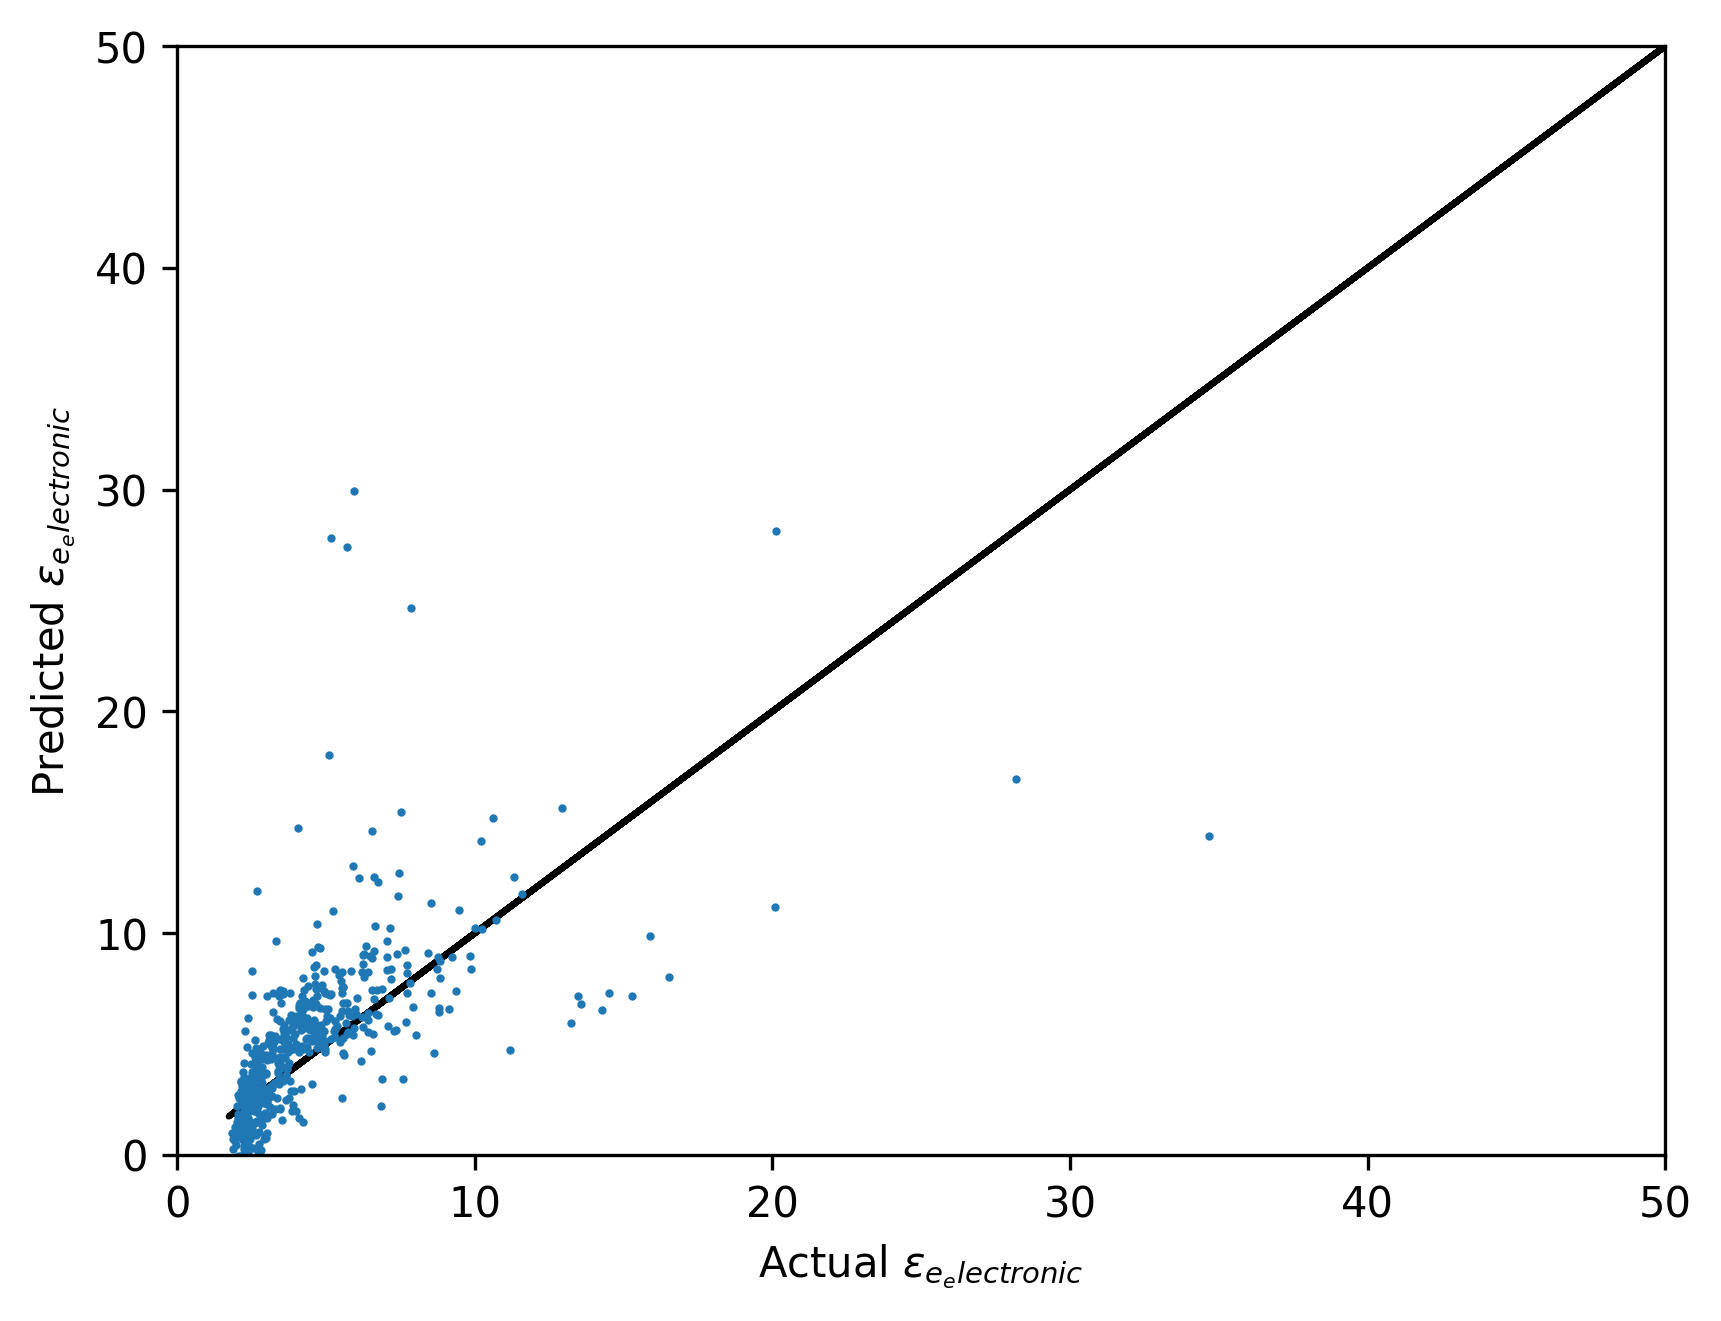

MSE: 257.4229561706264, MAE: 5.096805679184544


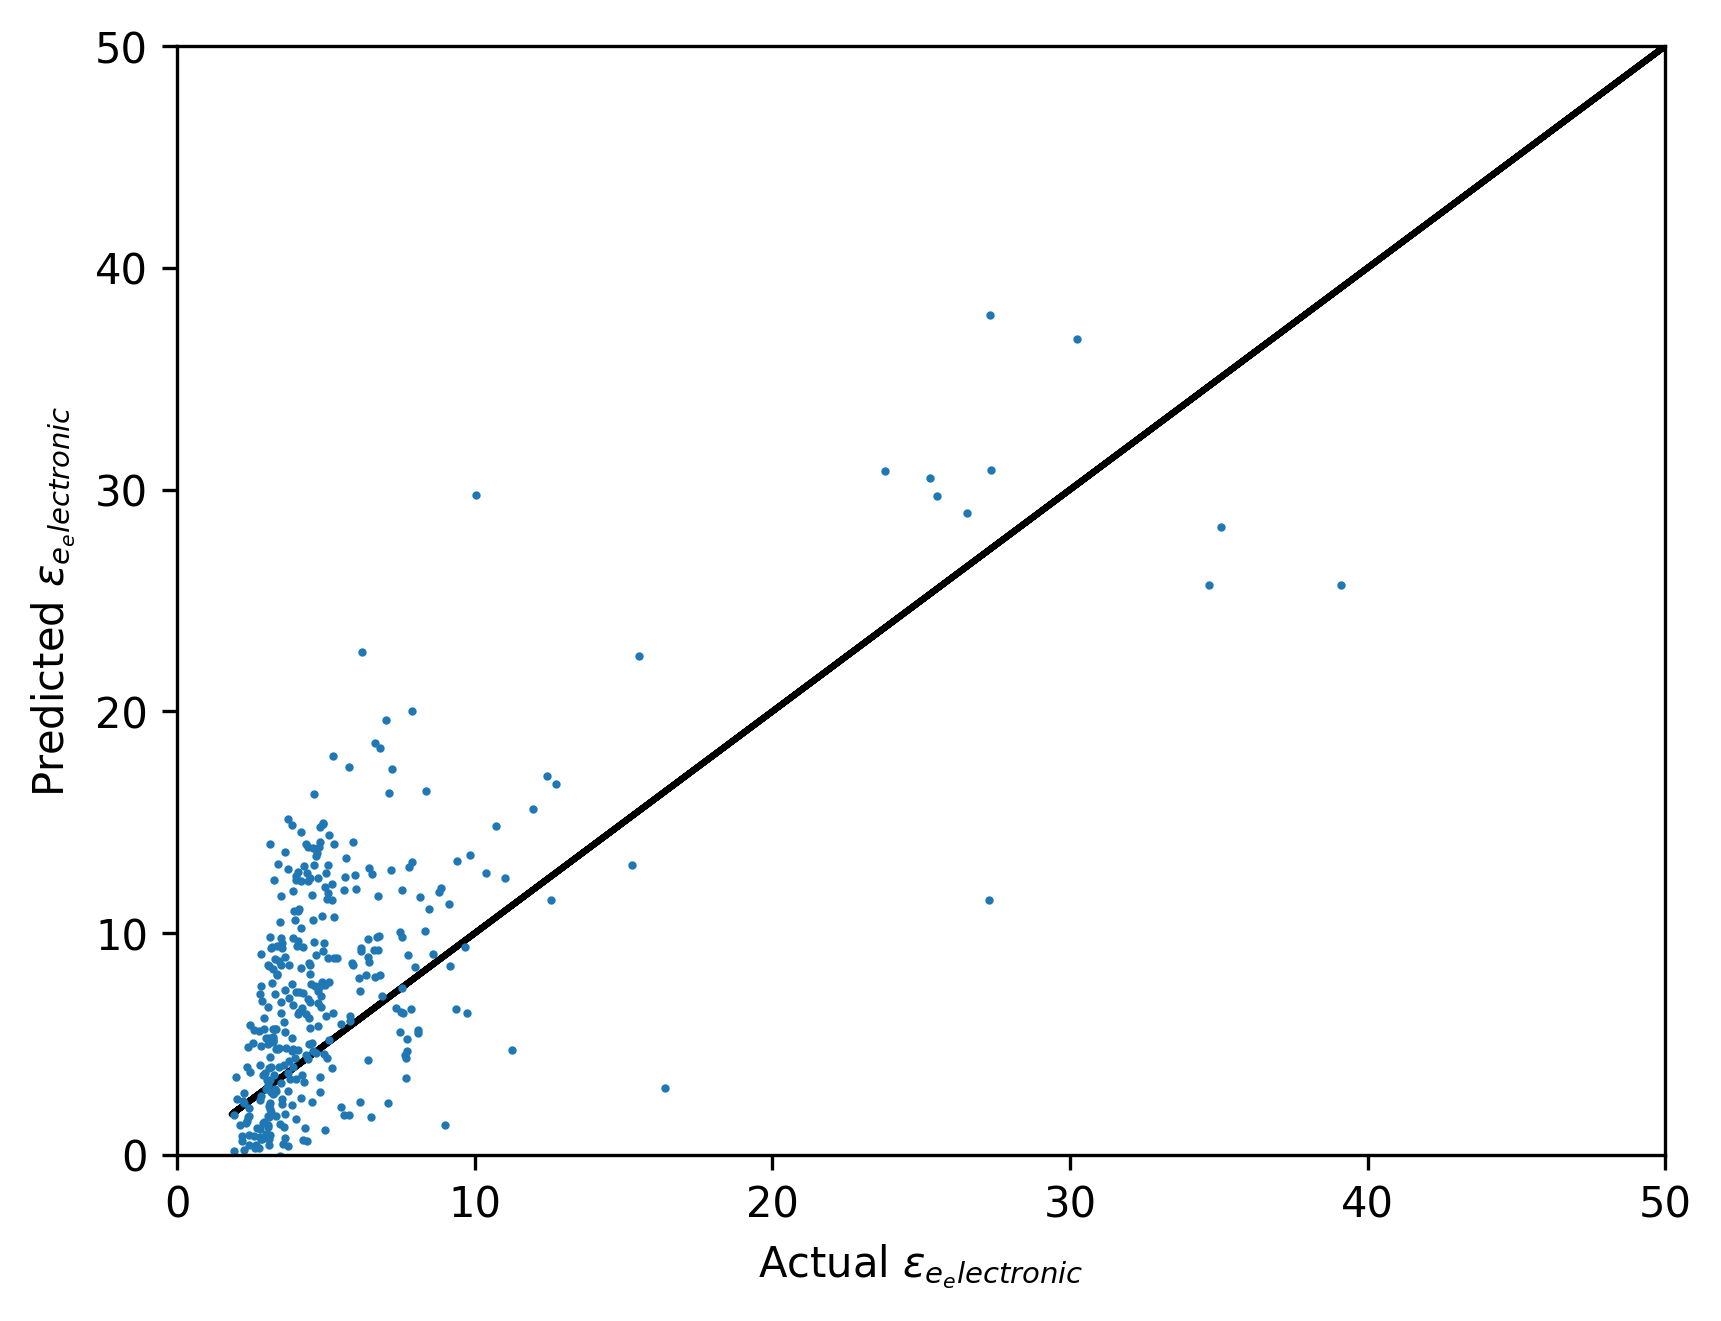

MSE: 39.81840368142497, MAE: 2.149376732007113


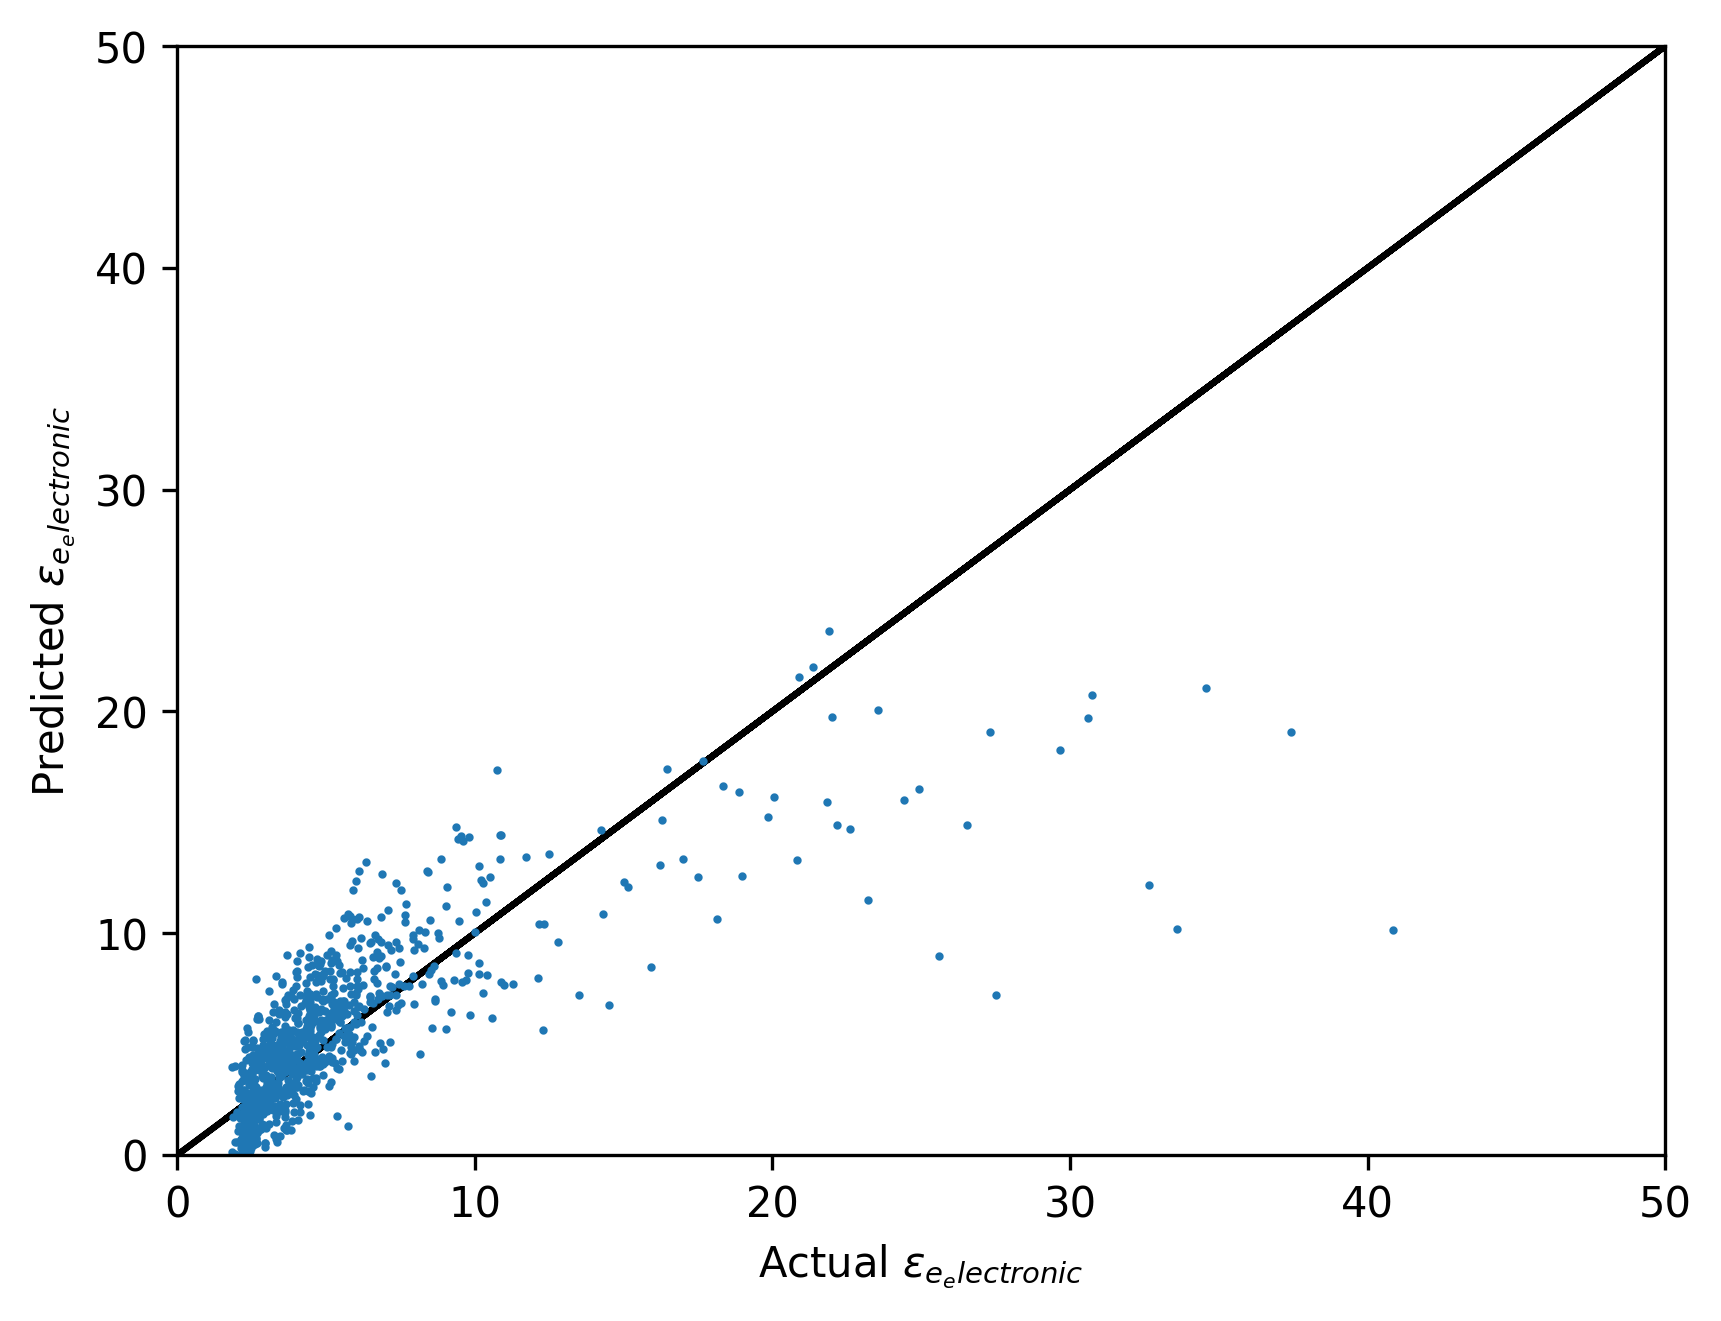

MSE: 352.3630917489734, MAE: 8.371822687588901


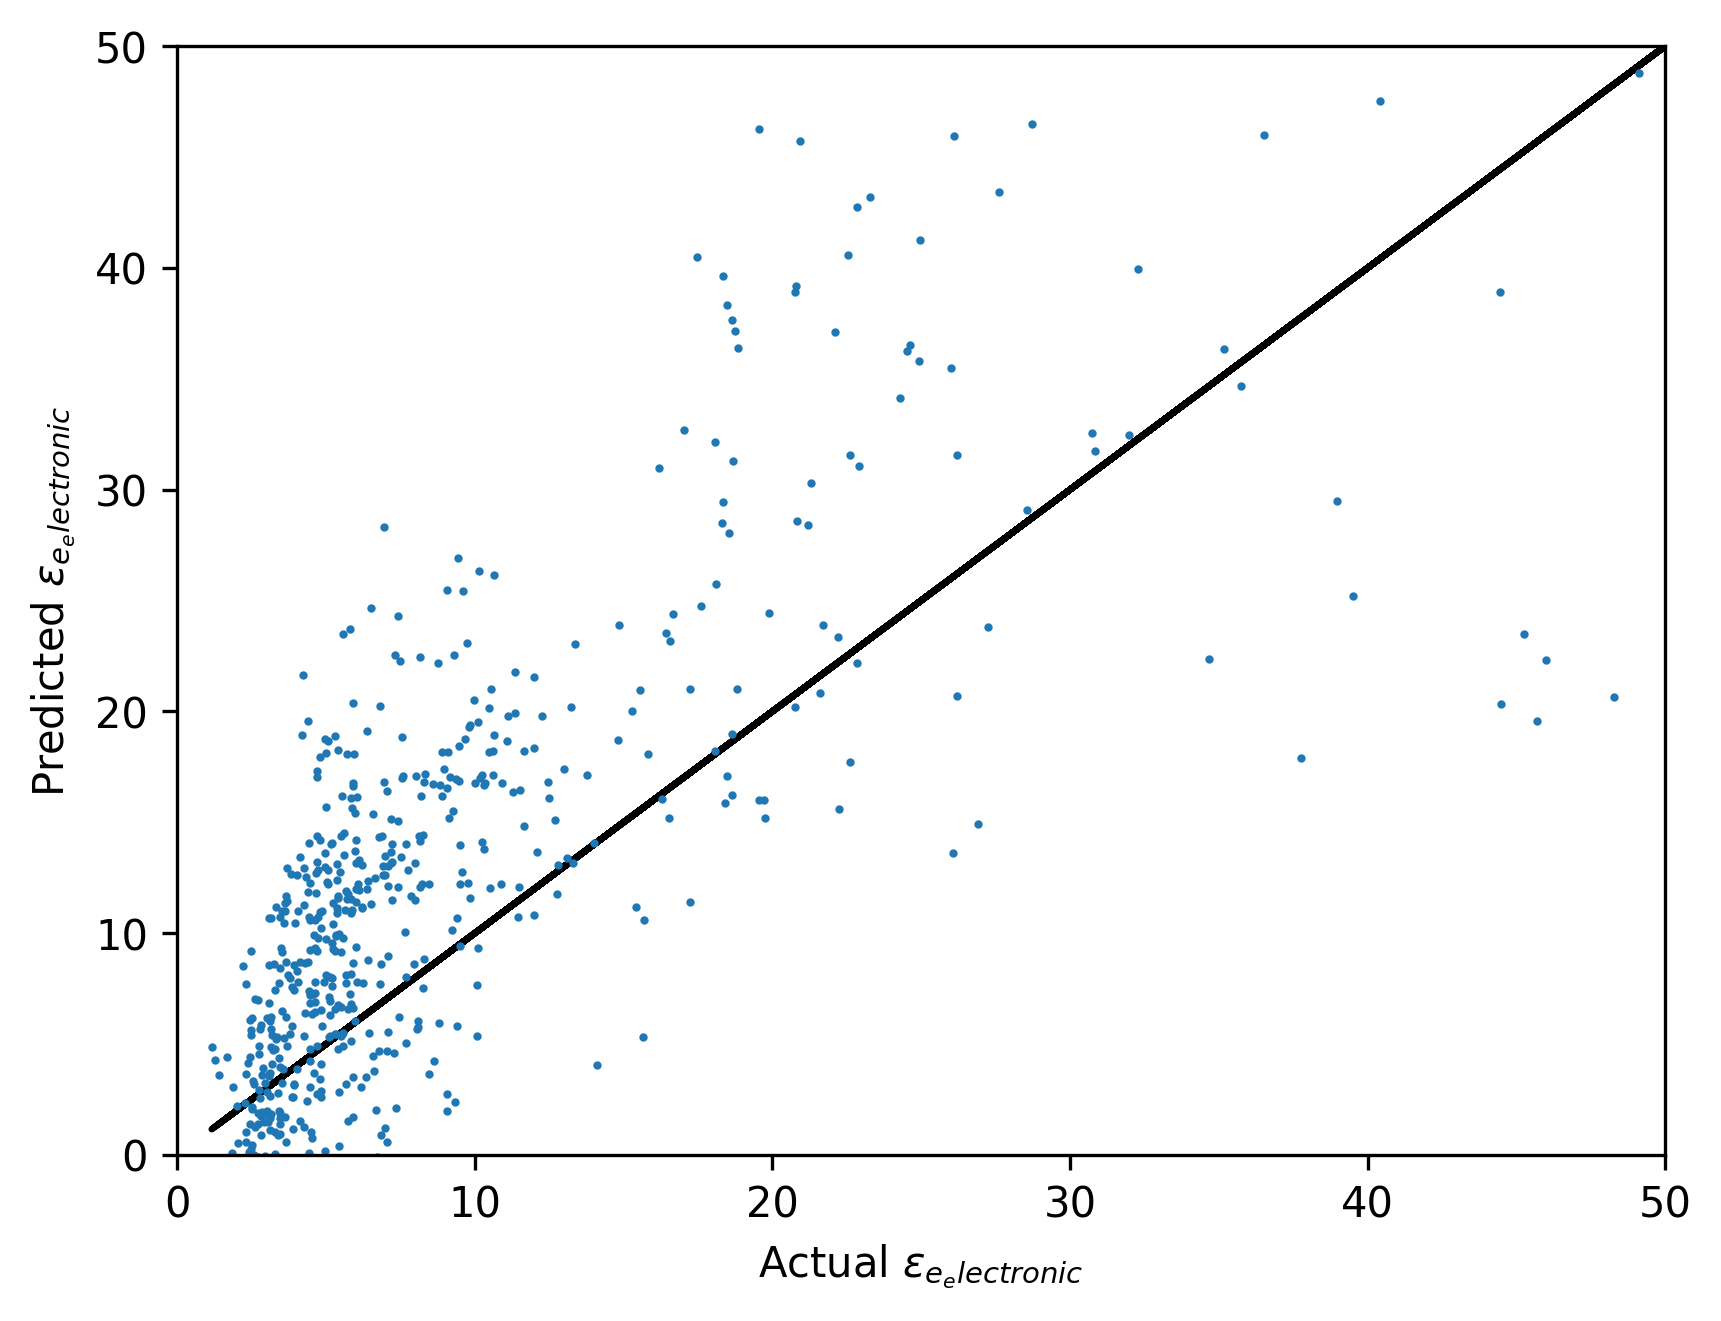

MSE: 151.9970174547208, MAE: 2.6985339779198325


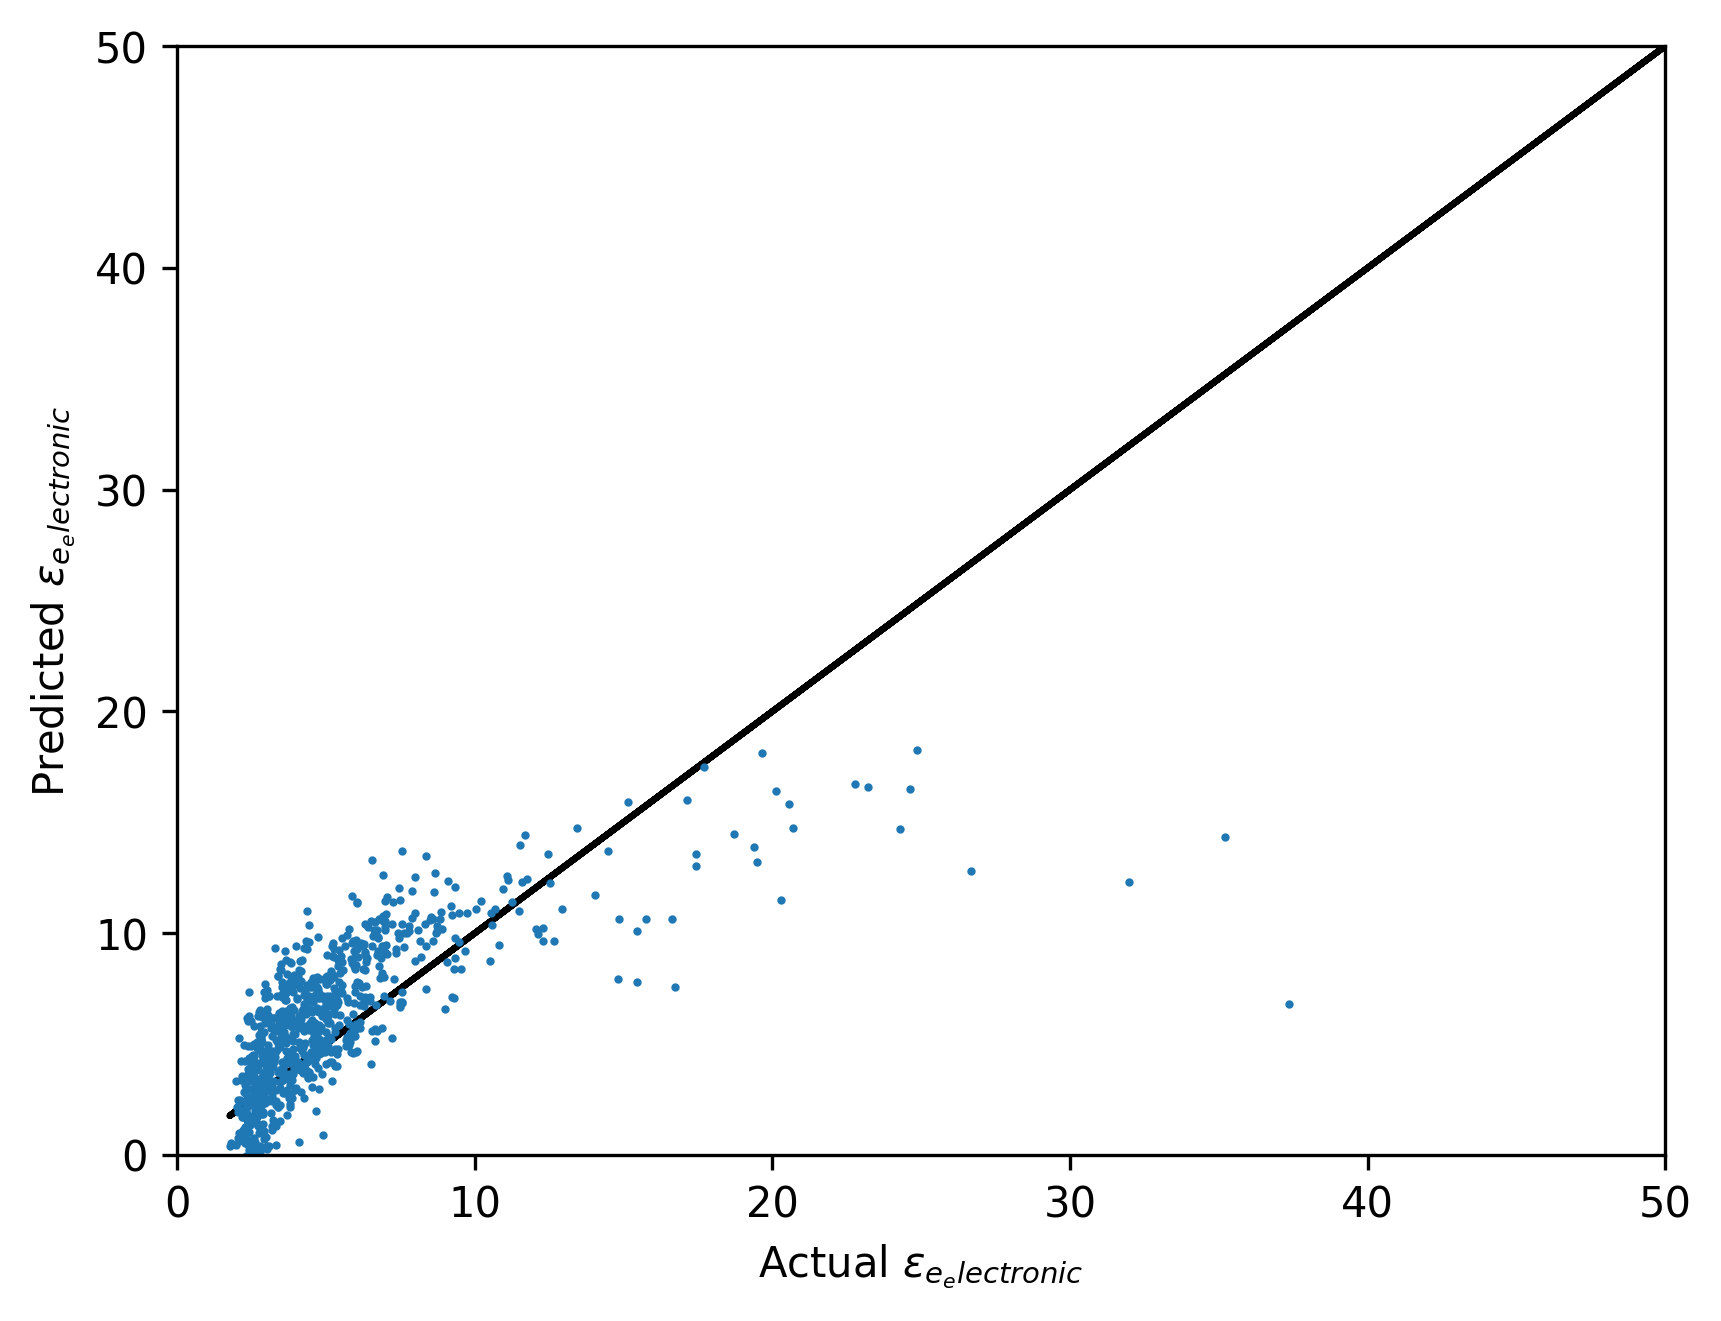

MSE: 341.5888463583374, MAE: 6.6818304636256665


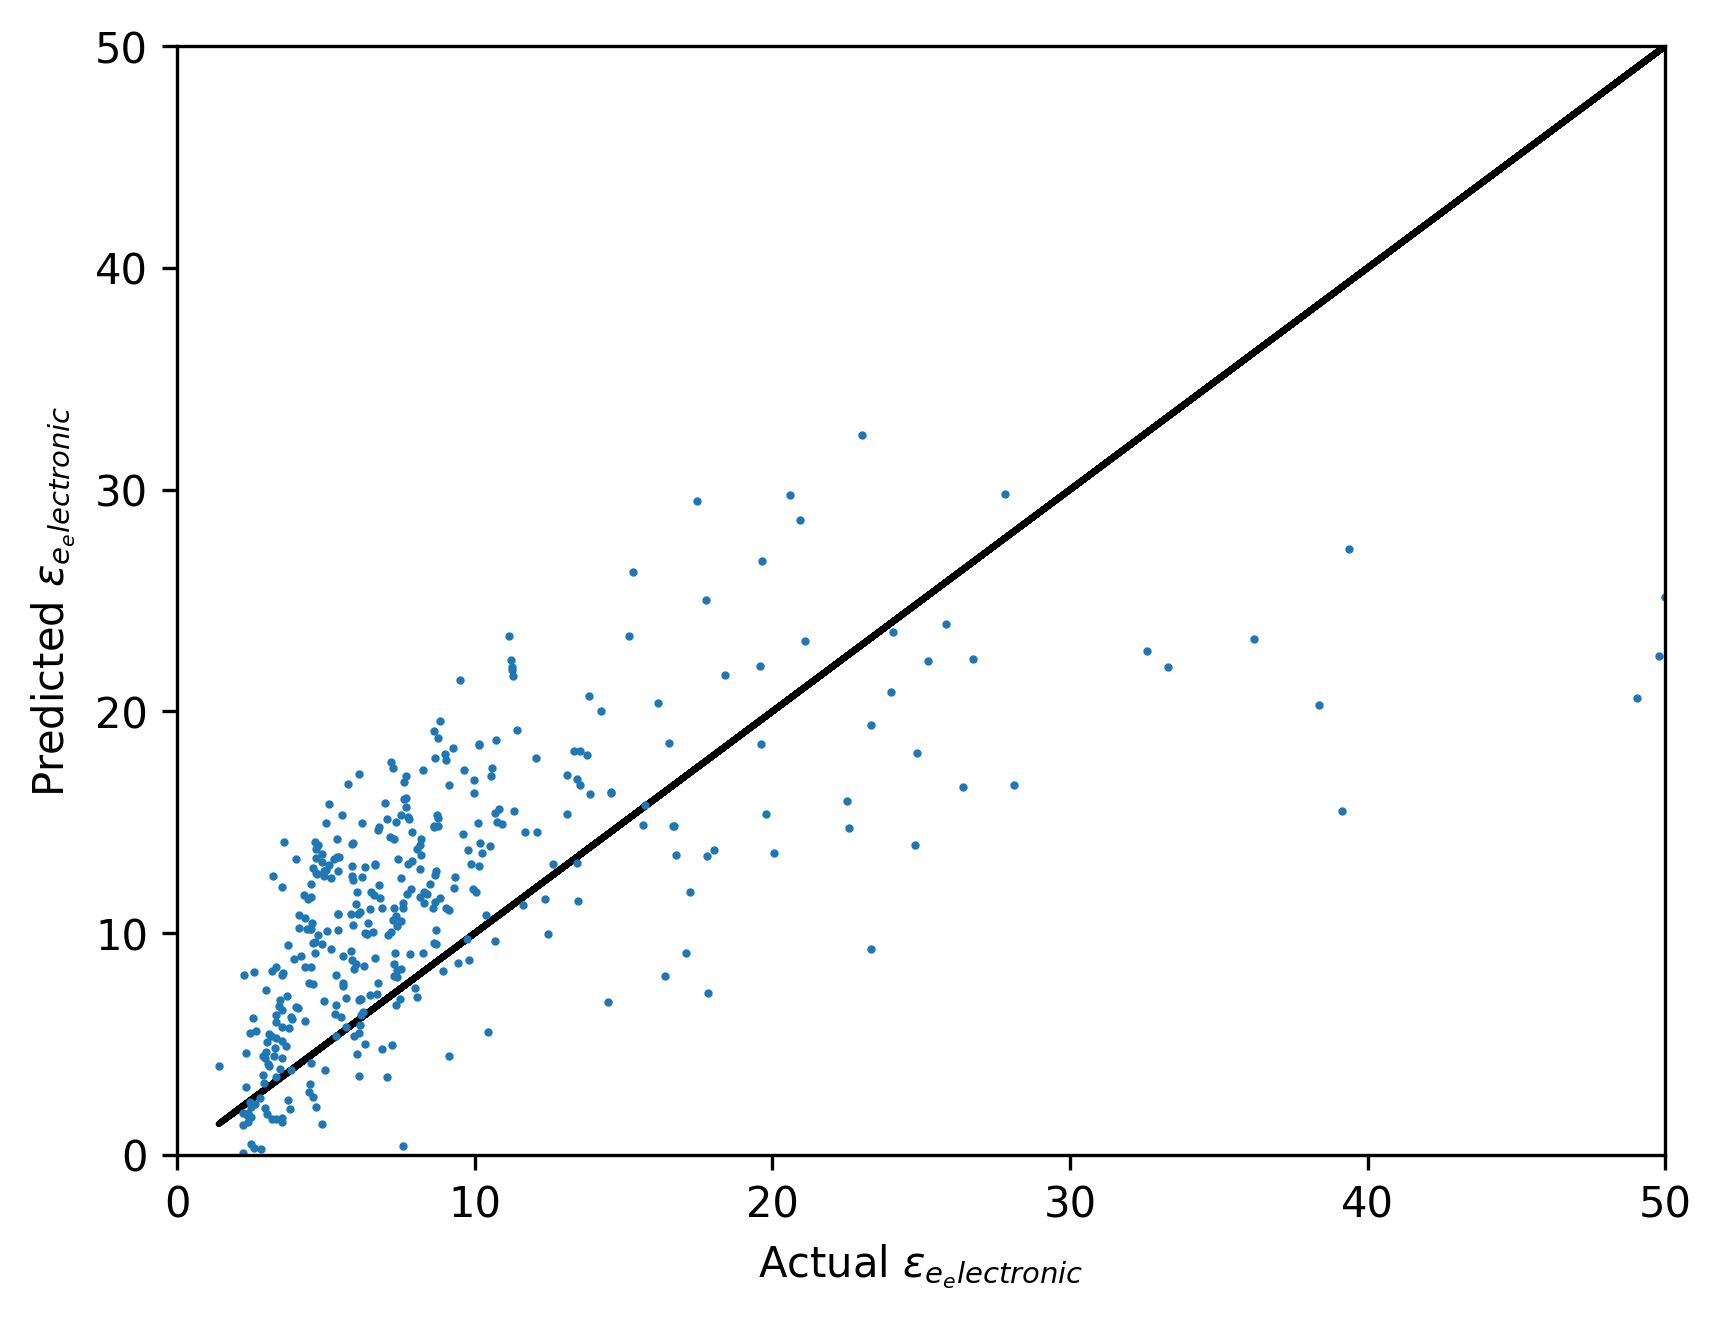

MSE: 23.4862182763803, MAE: 2.185521674251846


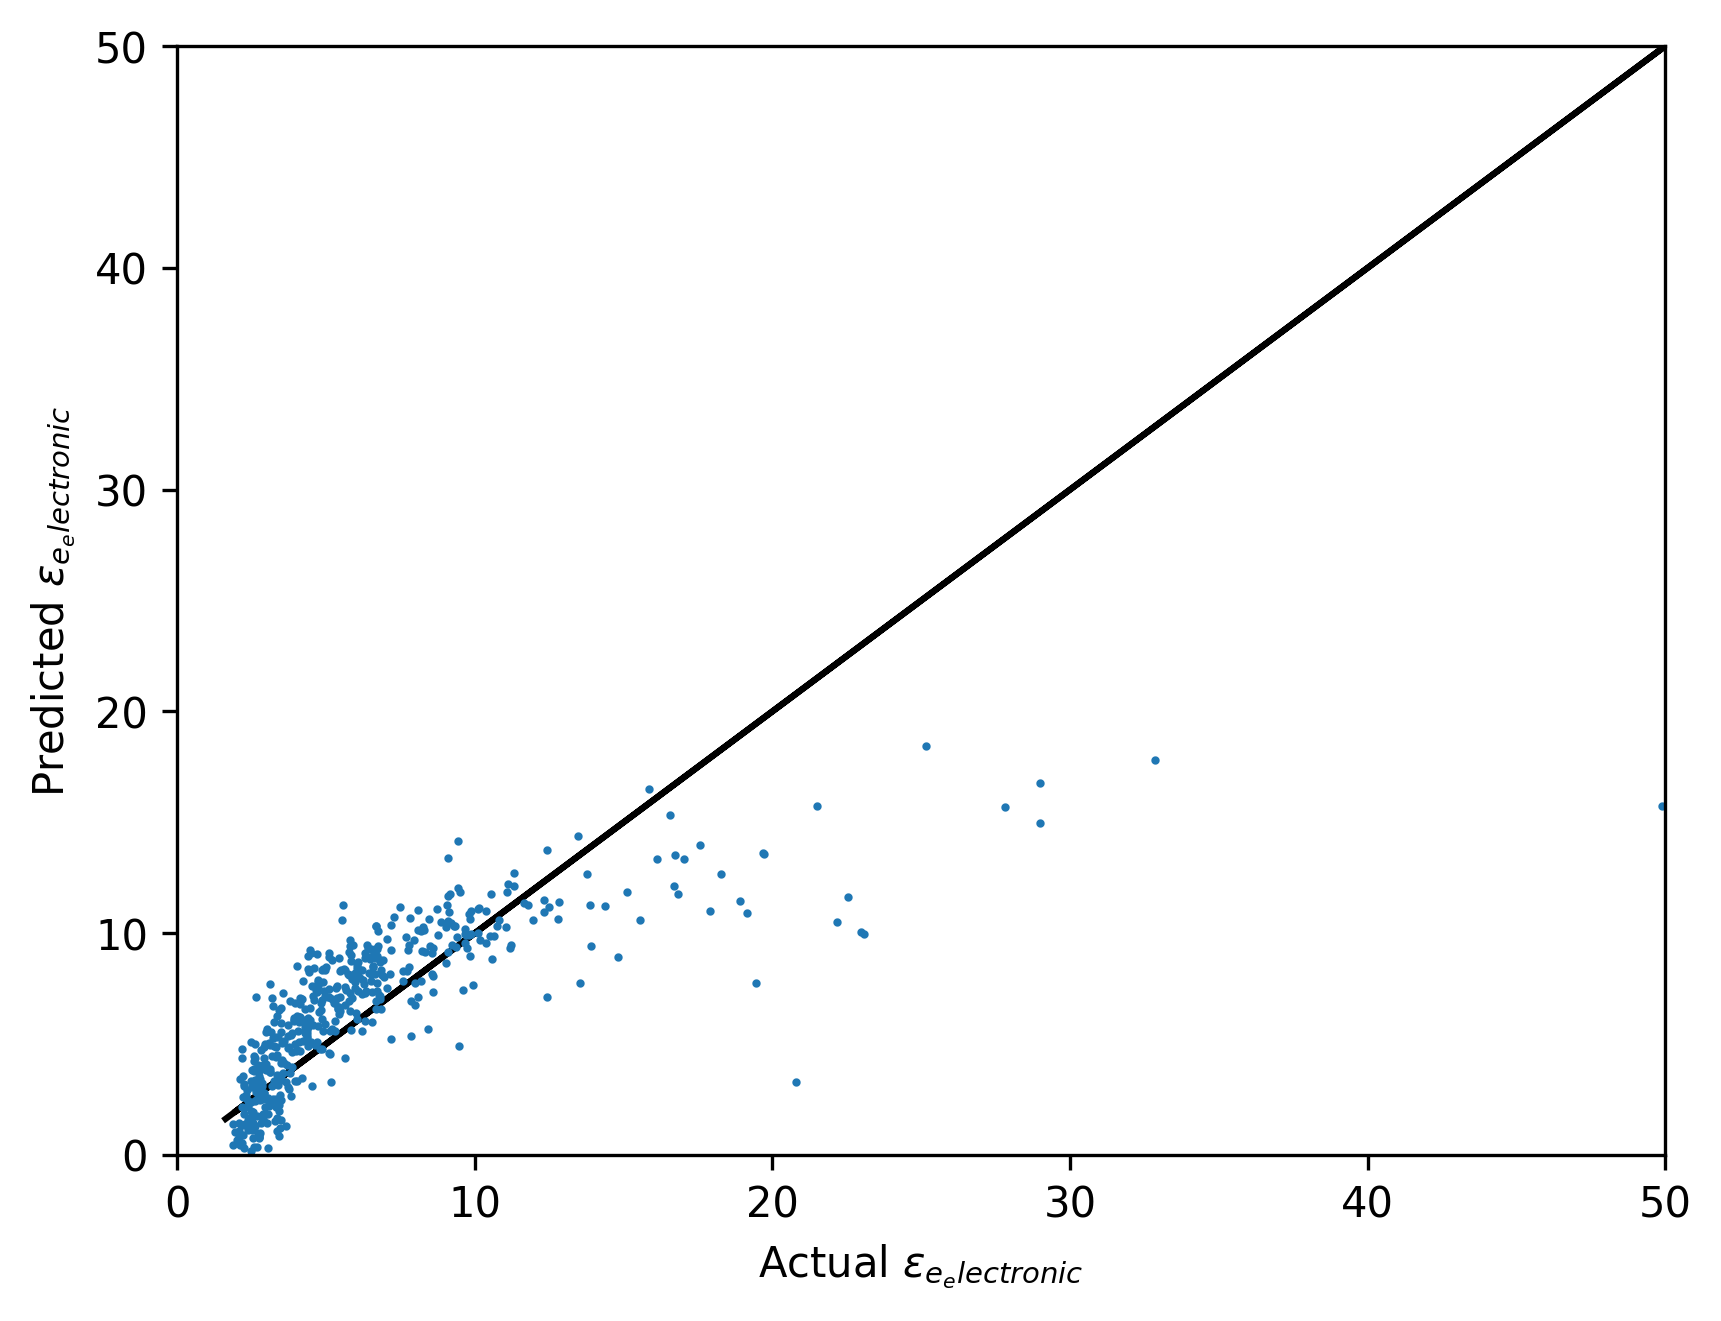

In [12]:
grouped_data = X_train.groupby('cluster')
# 对每个group进行训练
lr_models = {}
lr_scalers = {}
for group, data_group in grouped_data:
    # 仅训练数据量超过400个的
    if len(data_group) < 400:
        continue
    X, y = get_X_y(data_group)
    scaler, X_scaled = scale(X)
    lr = linear_regression(X_scaled, y)
    lr_models[group] = lr
    lr_scalers[group] = scaler


In [13]:
lr_models

{0: LinearRegression(),
 1: LinearRegression(),
 3: LinearRegression(),
 4: LinearRegression(),
 6: LinearRegression(),
 8: LinearRegression(),
 9: LinearRegression()}

In [14]:
lr_scalers

{0: StandardScaler(),
 1: StandardScaler(),
 3: StandardScaler(),
 4: StandardScaler(),
 6: StandardScaler(),
 8: StandardScaler(),
 9: StandardScaler()}

##### 模型测试

In [15]:
for index, test_item in X_test.iterrows():
    print(test_item)
    display(pd.DataFrame(test_item).T)
    break

crystal_system                            2.000000
space_group                             189.000000
band_gap                                  0.924500
volume                                  473.246667
density                                   3.461689
density_atomic                           39.437222
formation_energy_per_atom                -1.164229
MagpieData minimum Number                34.000000
MagpieData maximum Number                37.000000
MagpieData range Number                   3.000000
MagpieData mean Number                   35.500000
MagpieData minimum CovalentRadius       120.000000
MagpieData maximum CovalentRadius       220.000000
MagpieData range CovalentRadius         100.000000
MagpieData mean CovalentRadius          170.000000
MagpieData minimum Electronegativity      0.820000
MagpieData maximum Electronegativity      2.550000
MagpieData range Electronegativity        1.730000
MagpieData mean Electronegativity         1.685000
cluster                        

,crystal_system,space_group,band_gap,volume,density,density_atomic,formation_energy_per_atom,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster,e_electronic,e_ionic,e_total
5083,2.0,189.0,0.9245,473.246667,3.461689,39.437222,-1.164229,34.0,37.0,3.0,...,100.0,170.0,0.82,2.55,1.73,1.685,1.0,3.363473,2.902911,6.266384


In [16]:
# 模型测试
def model_test(X_test, models, scalers):
    X_test_copy = X_test.copy()
    y_preds = []
    for index, test_item in X_test_copy.iterrows():
        cluster = test_item['cluster']
        if cluster not in models.keys():
            y_preds.append(None)
            continue
        X_item = test_item.drop(['e_total', 'e_ionic', 'e_electronic'])
        X_item_scaled = scalers[cluster].transform(pd.DataFrame(X_item).T)

        y_pred = models[cluster].predict(X_item_scaled)
        y_preds.append(y_pred[0])
        # print(f'Cluster: {cluster}, Predicted e_electronic: {y_pred[0]}')
        
    X_test_copy[DIELECTRIC_CONSTANT+'_pred'] = y_preds
    X_test_copy.dropna(axis=0, inplace=True)
    mse = mean_squared_error(X_test_copy[DIELECTRIC_CONSTANT], X_test_copy[DIELECTRIC_CONSTANT+'_pred'])
    mae = mean_absolute_error(X_test_copy[DIELECTRIC_CONSTANT], X_test_copy[DIELECTRIC_CONSTANT+'_pred'])
    plot_cross_val_scores(mse, mae, X_test_copy[DIELECTRIC_CONSTANT+'_pred'], X_test_copy[DIELECTRIC_CONSTANT])

    return mse, mae, X_test_copy

MSE: 90.95350531564681, MAE: 3.723865008495316


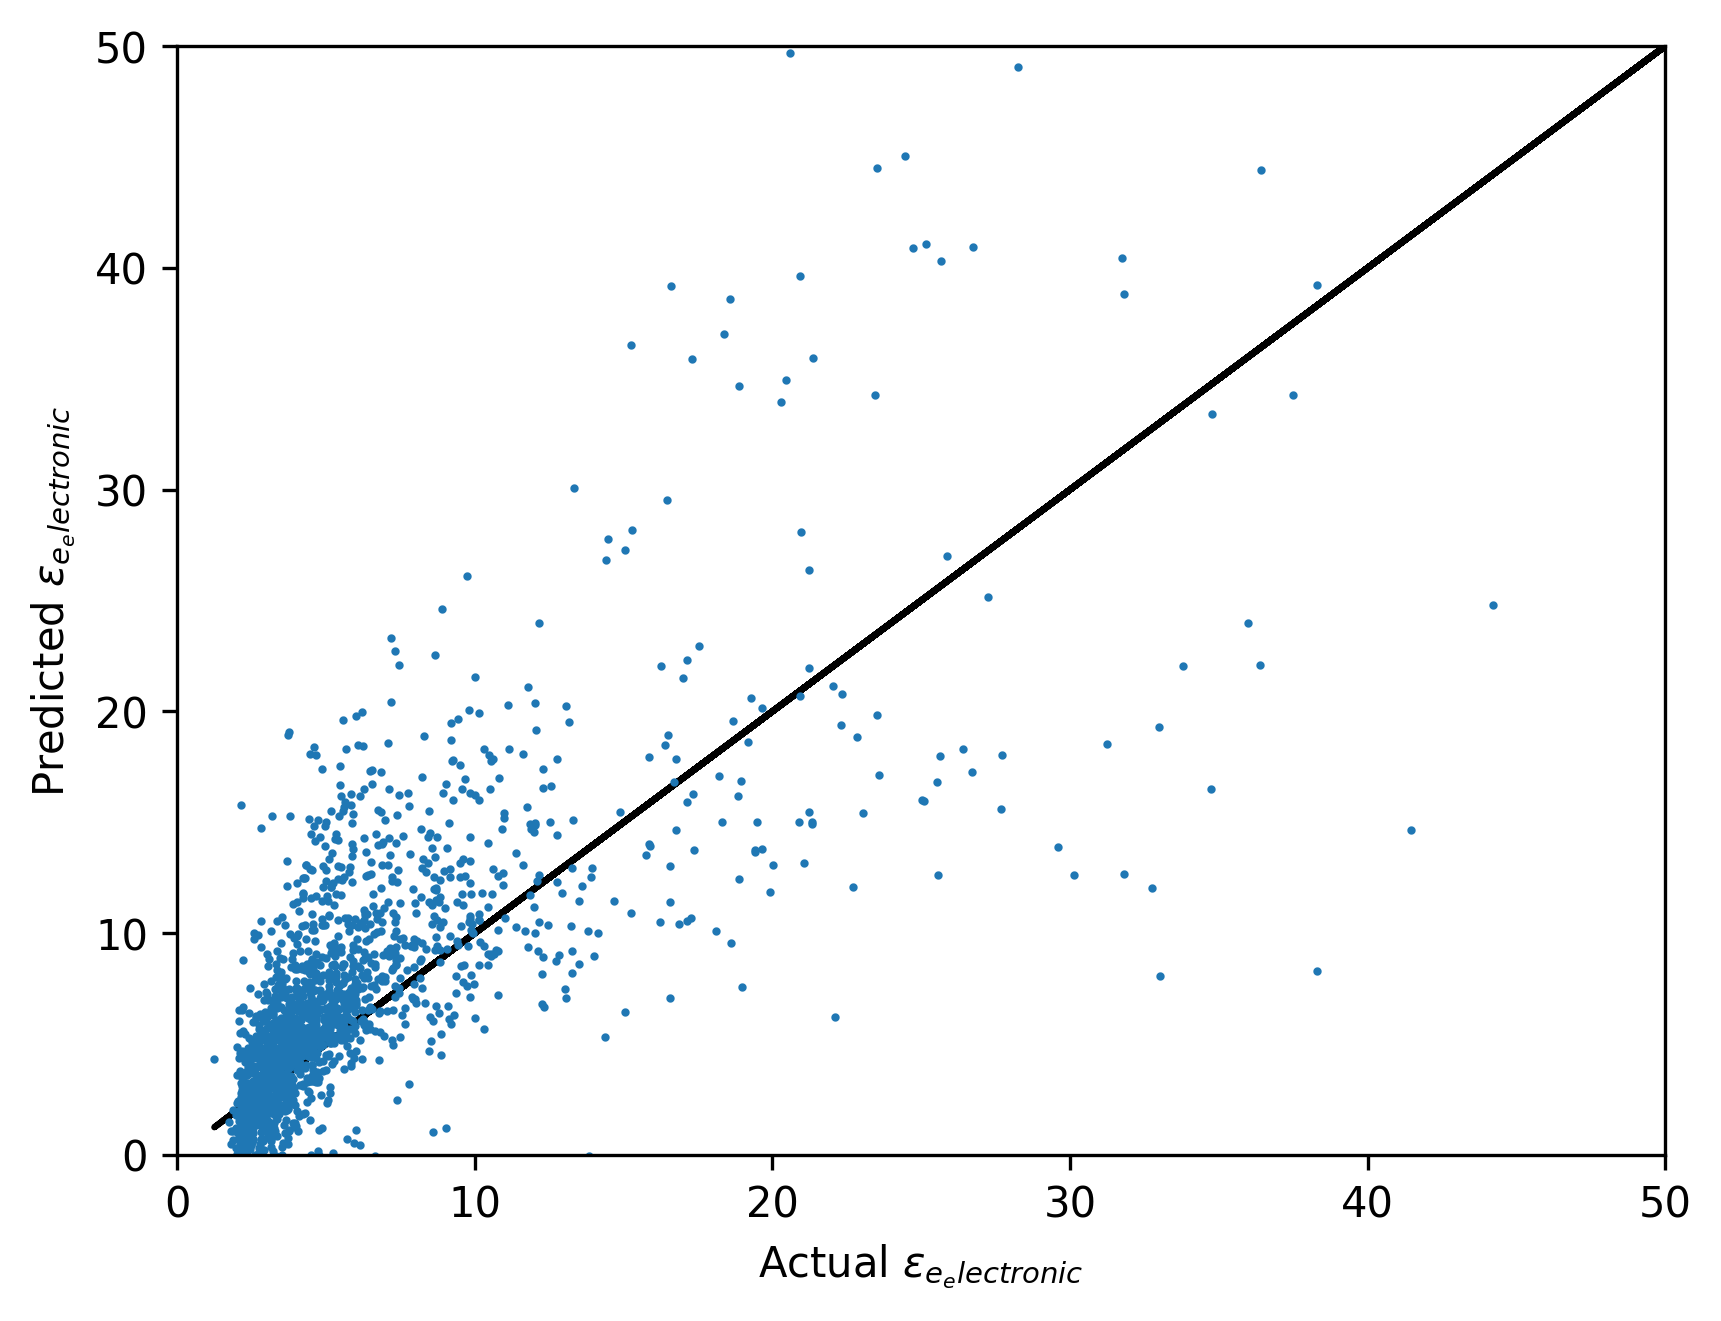

In [17]:
model_test(X_test, lr_models, lr_scalers);

#### 2. 决策树模型


In [18]:
from sklearn.tree import DecisionTreeRegressor, plot_tree       # ML model

def decision_tree(X_train, y_train):
    # 进行交叉验证选择最好的深度

    max_scores=-1e5
    best_depth = 0
    for depth in range(5, 15):
        dt = DecisionTreeRegressor(max_depth=depth,random_state=RANDOM_STATE)      # decision tree constructor
        scores, y_hat = model_cross_train(dt, X_train, y_train)                              
        if scores.mean() > max_scores:
            max_scores = scores.mean()
            best_depth = depth
            # plot_cross_val_scores(scores.mean(), None, y_hat, y_train)
    # 确定超参数MAX_DEPTH后，使用最优的超参数在整个训练集上训练模型
    # 模型训练
    dt = DecisionTreeRegressor(max_depth=best_depth, random_state=RANDOM_STATE)
    dt.fit(X_train, y_train)
    # 模型训练集测试
    mse, mae, y_pred = model_eval(dt, X_train, y_train)
    # 绘制结果
    plot_cross_val_scores(mse, mae, y_pred, y_train)
    return dt, best_depth

MSE: 0.21962986539585097, MAE: 0.2728317279039351


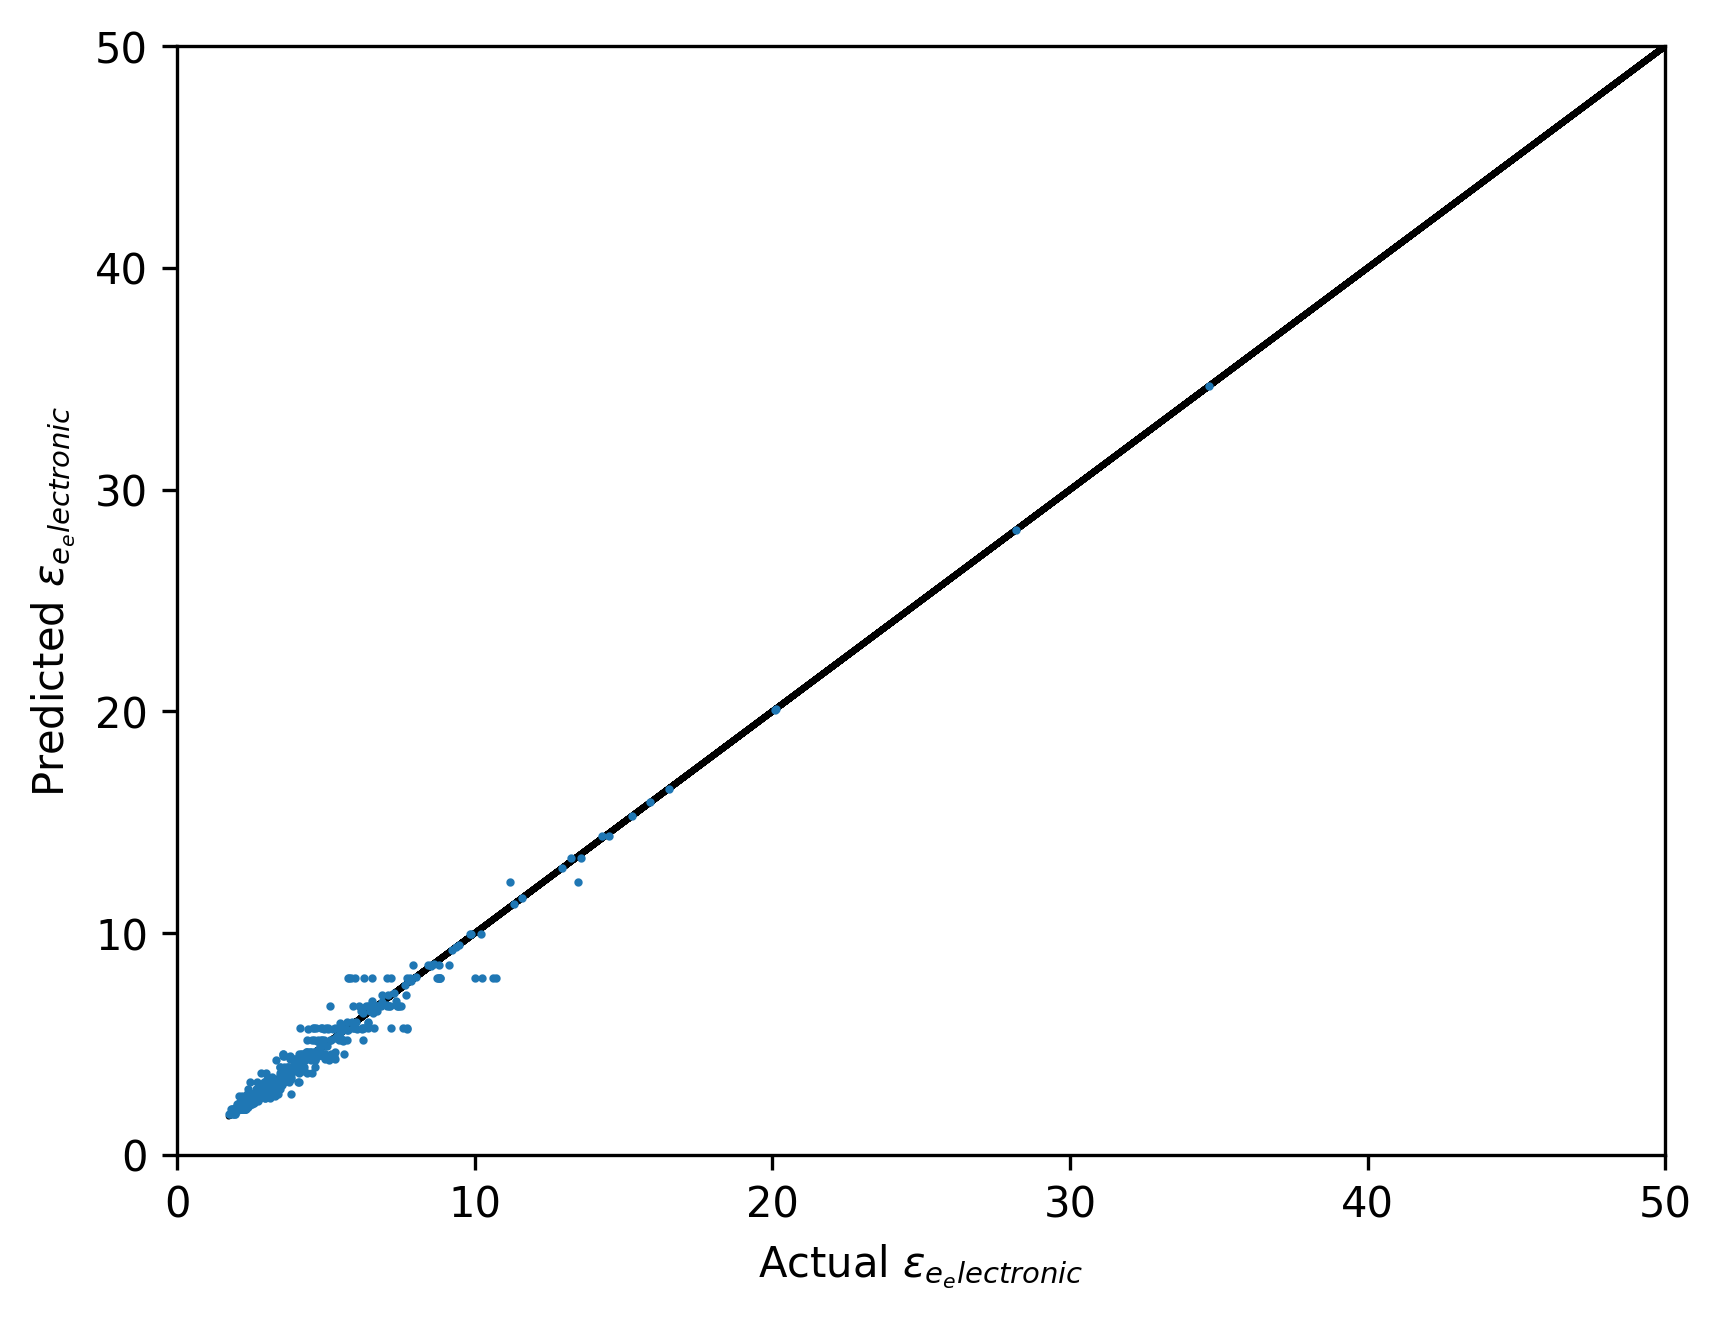

MSE: 0.4707345294568055, MAE: 0.4792882003997954


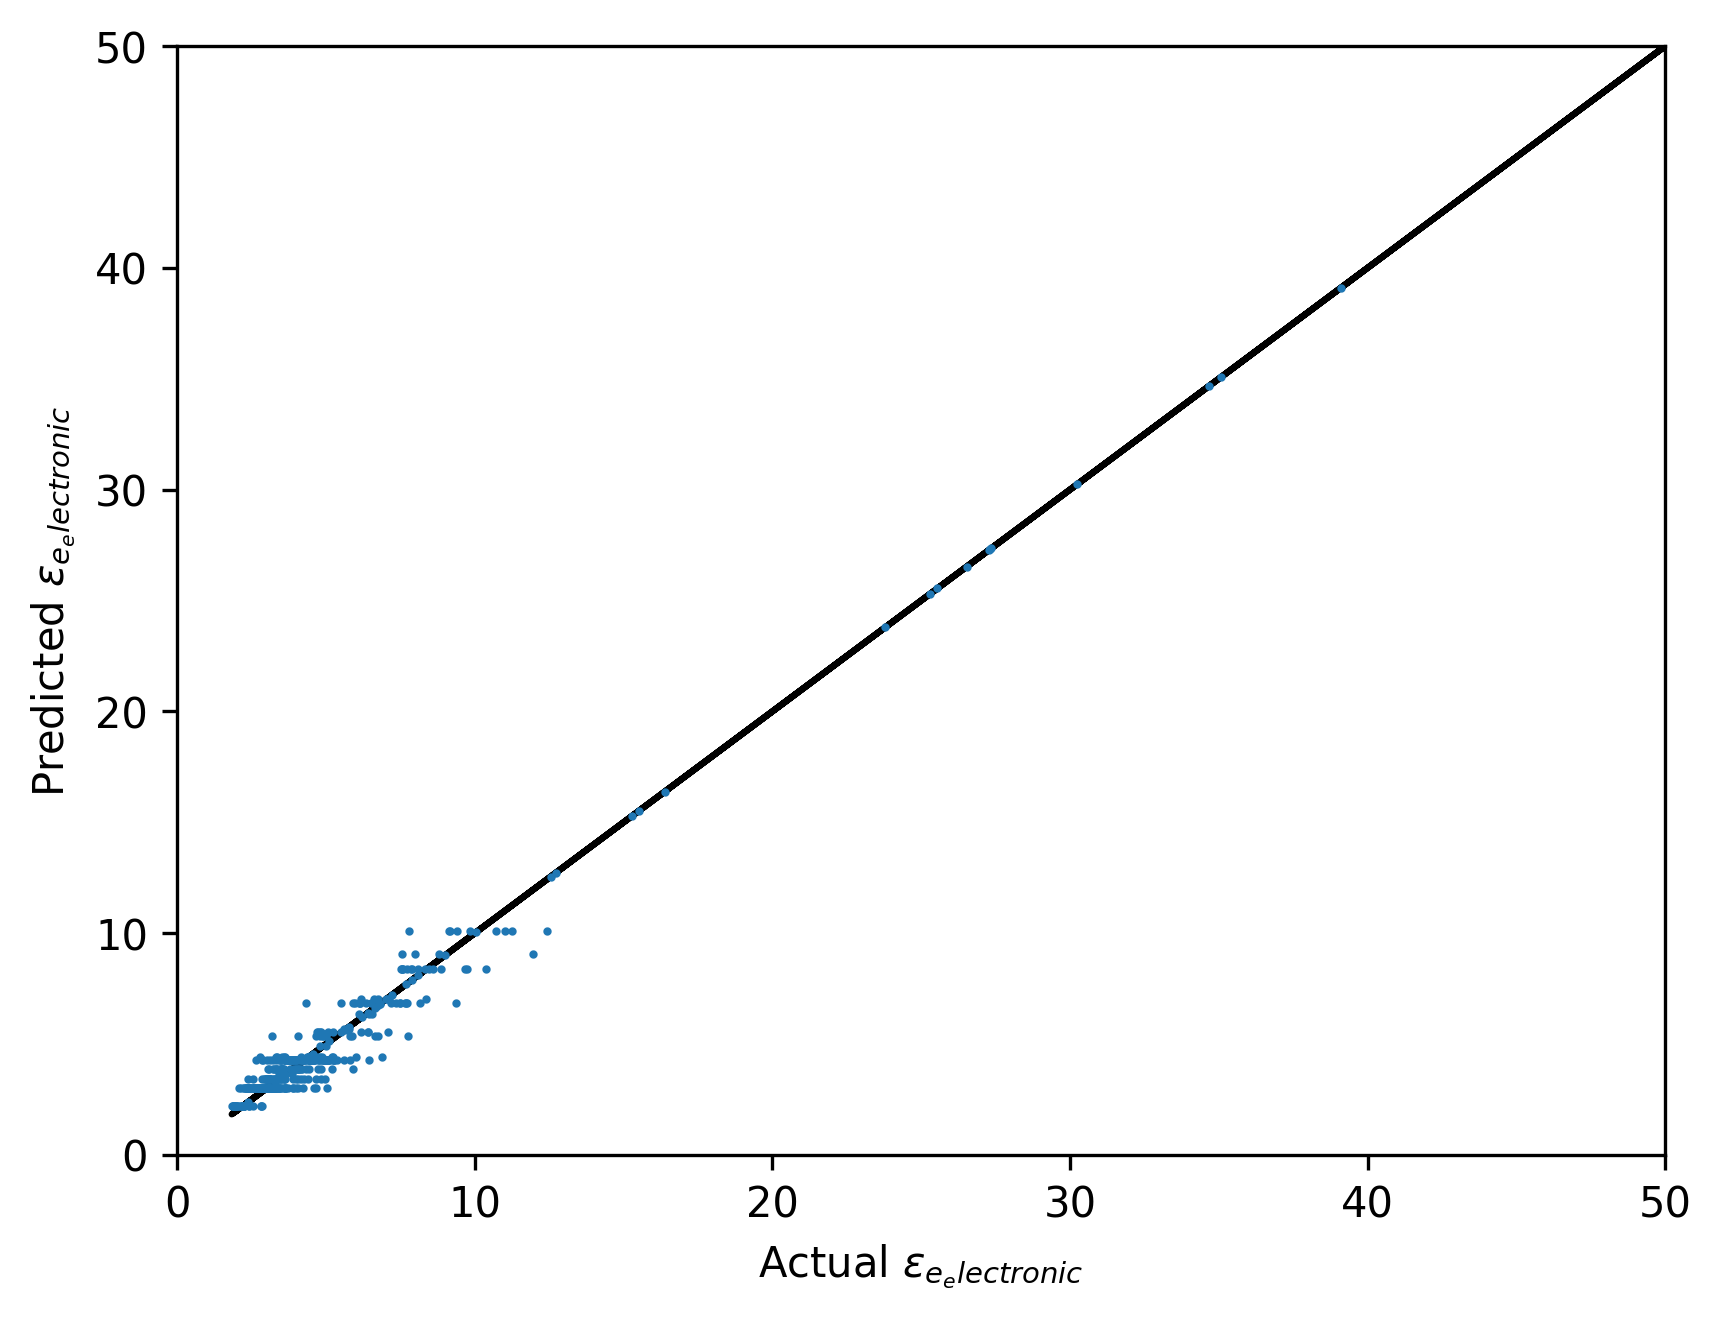

MSE: 9.572352051891068, MAE: 1.2664962602564145


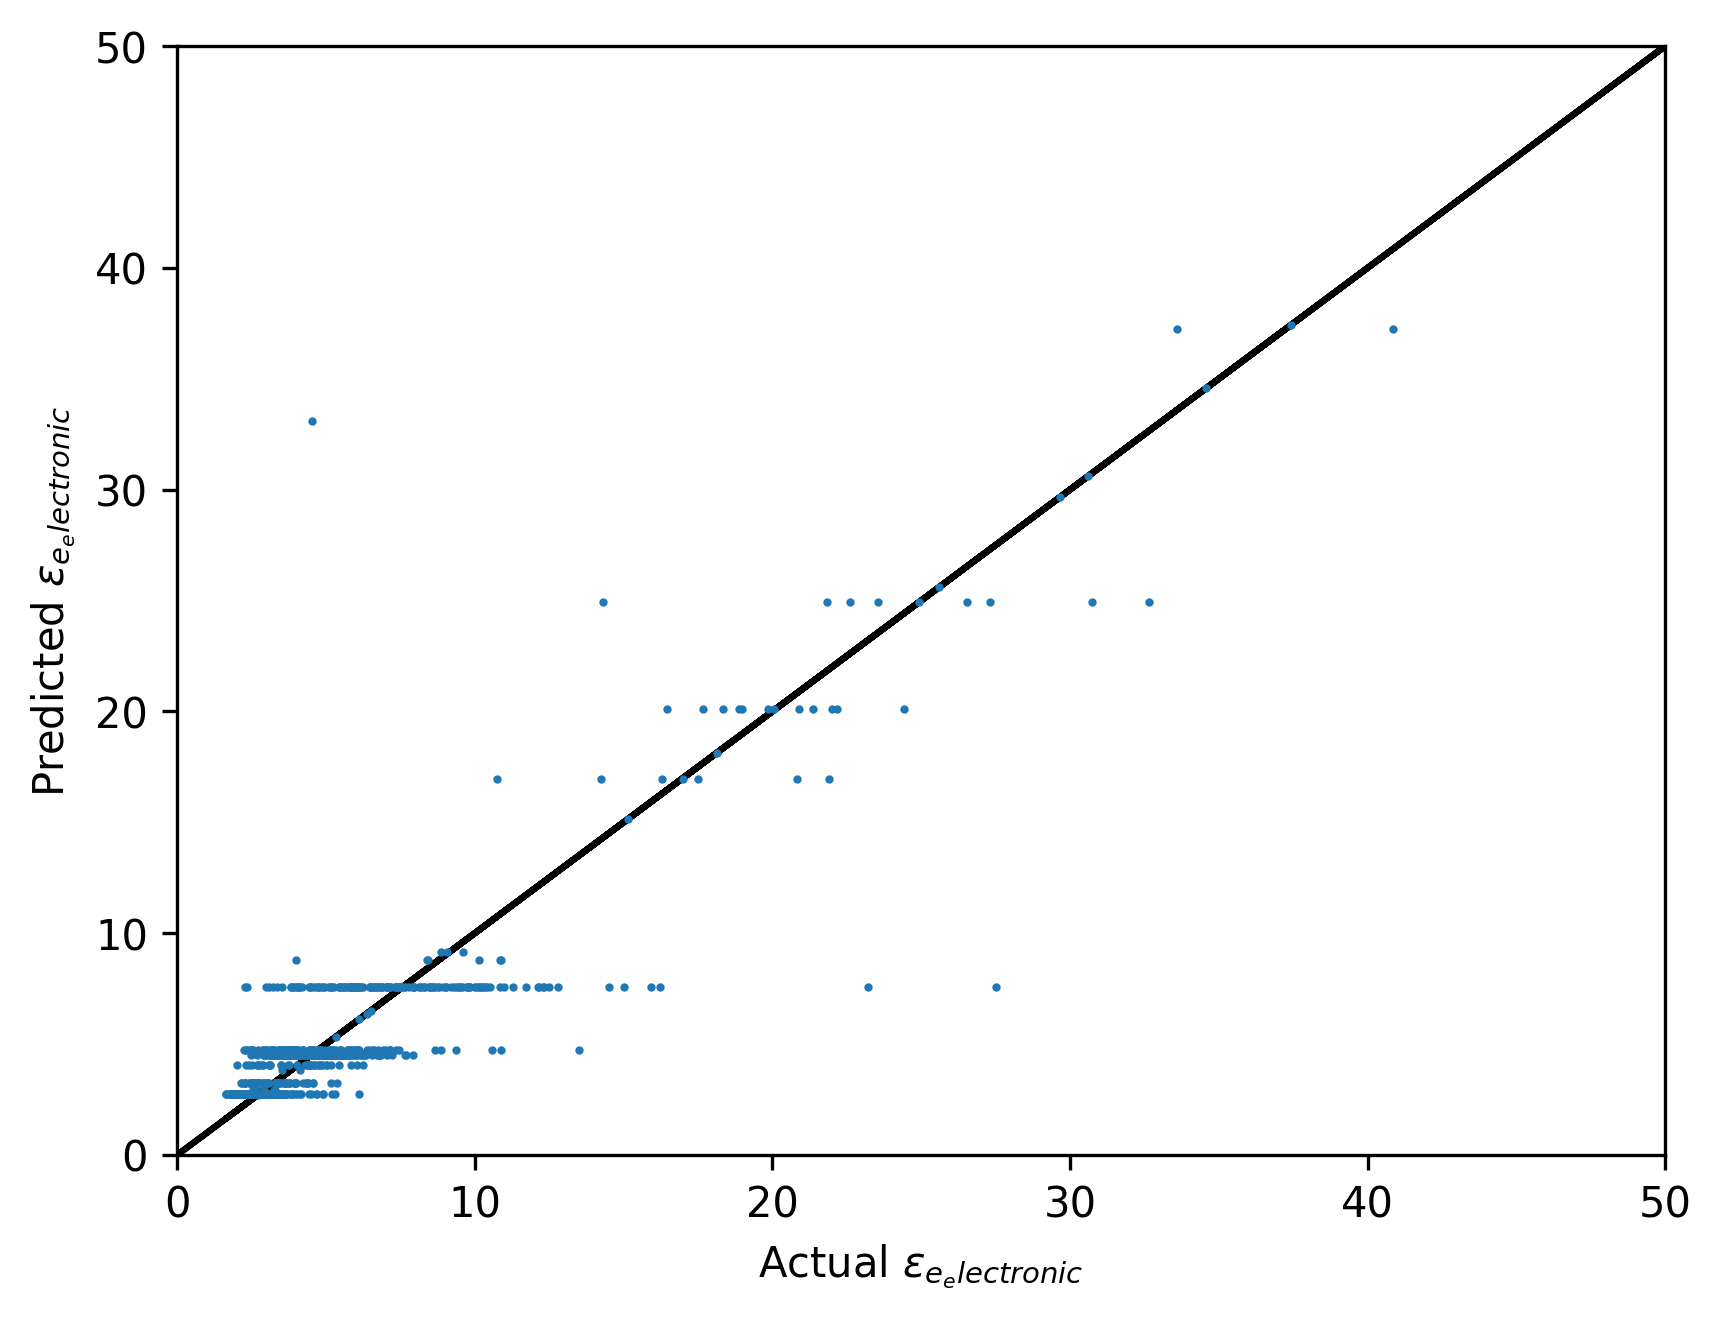

MSE: 10.592671584320431, MAE: 1.4825941905707114


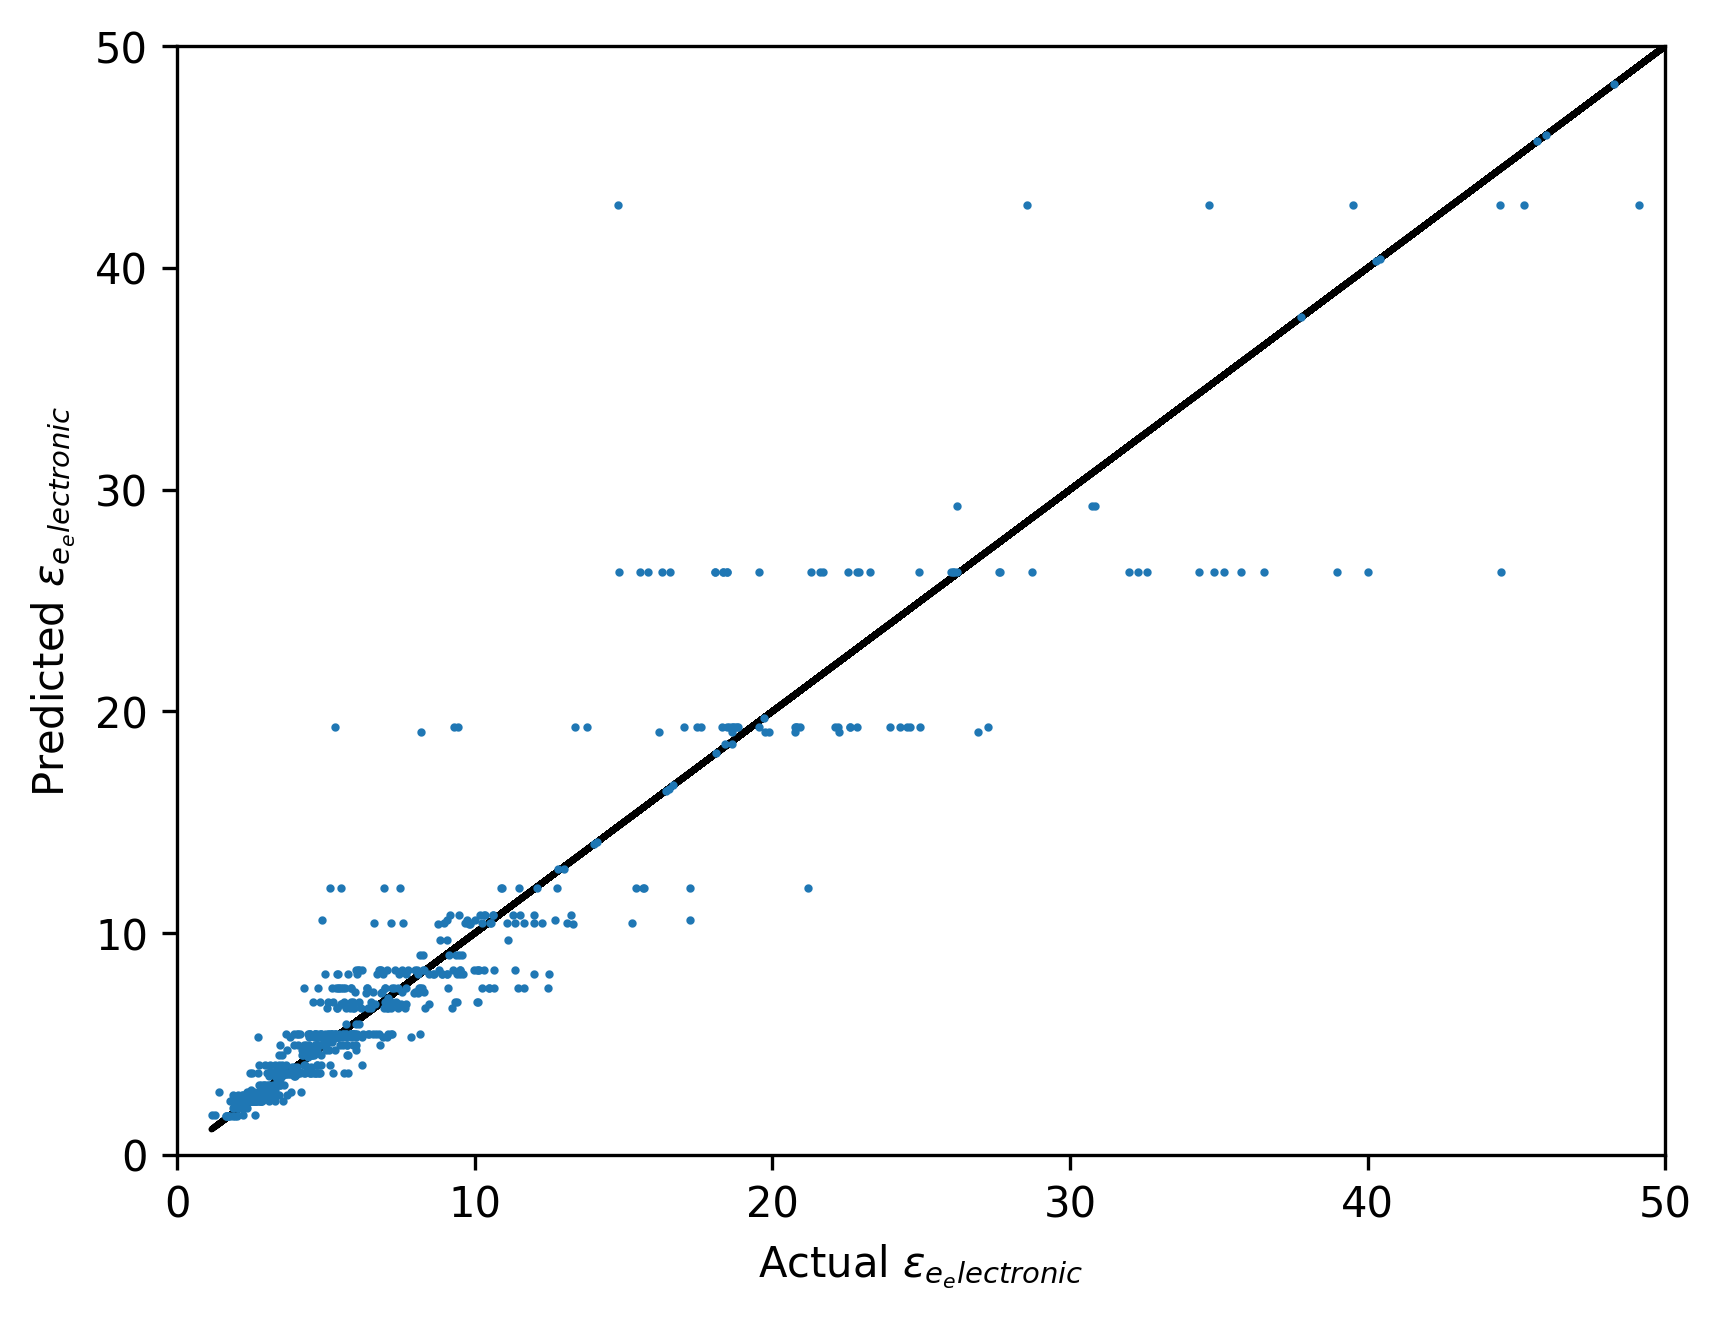

MSE: 0.023466677484637825, MAE: 0.07633826284209647


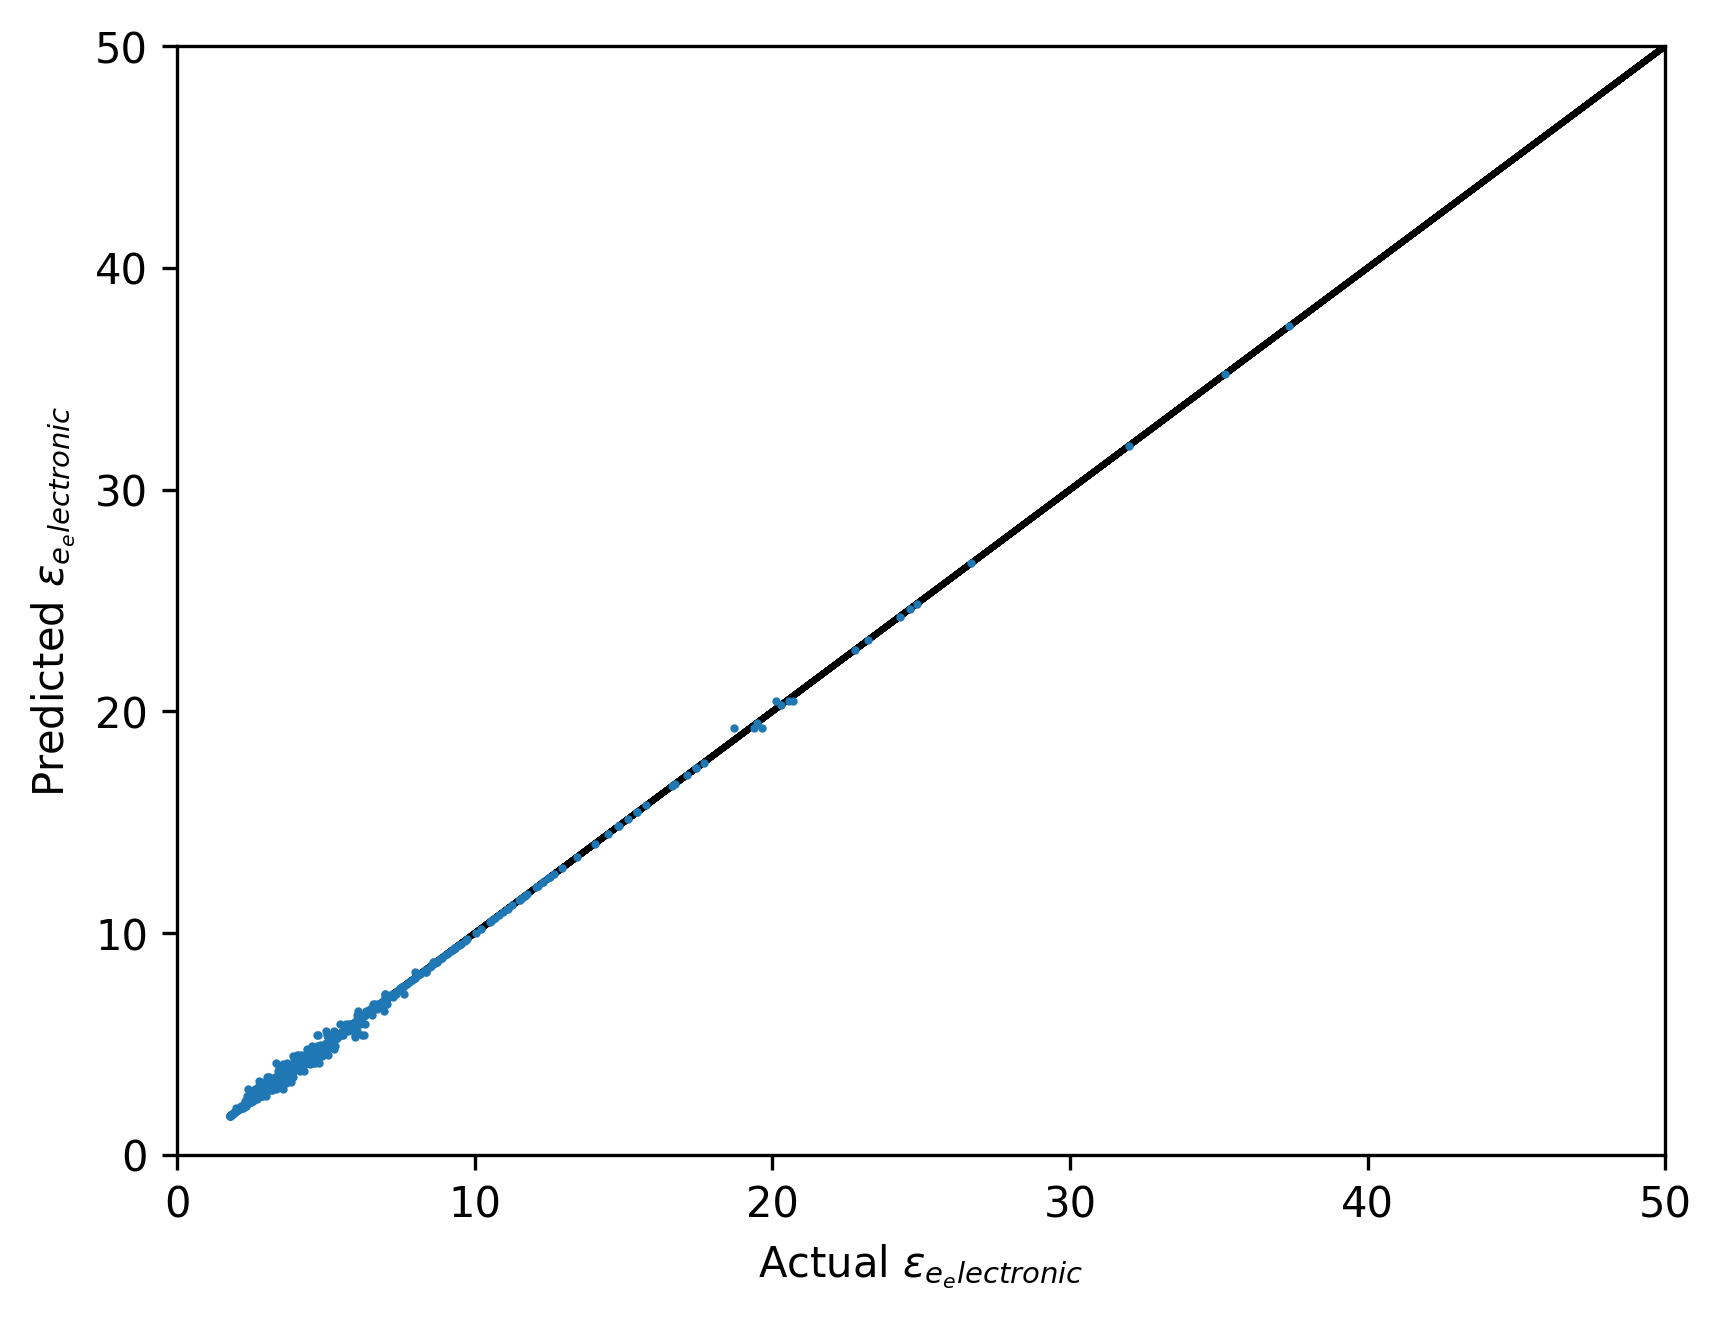

MSE: 13.156831543165858, MAE: 1.6744101800443183


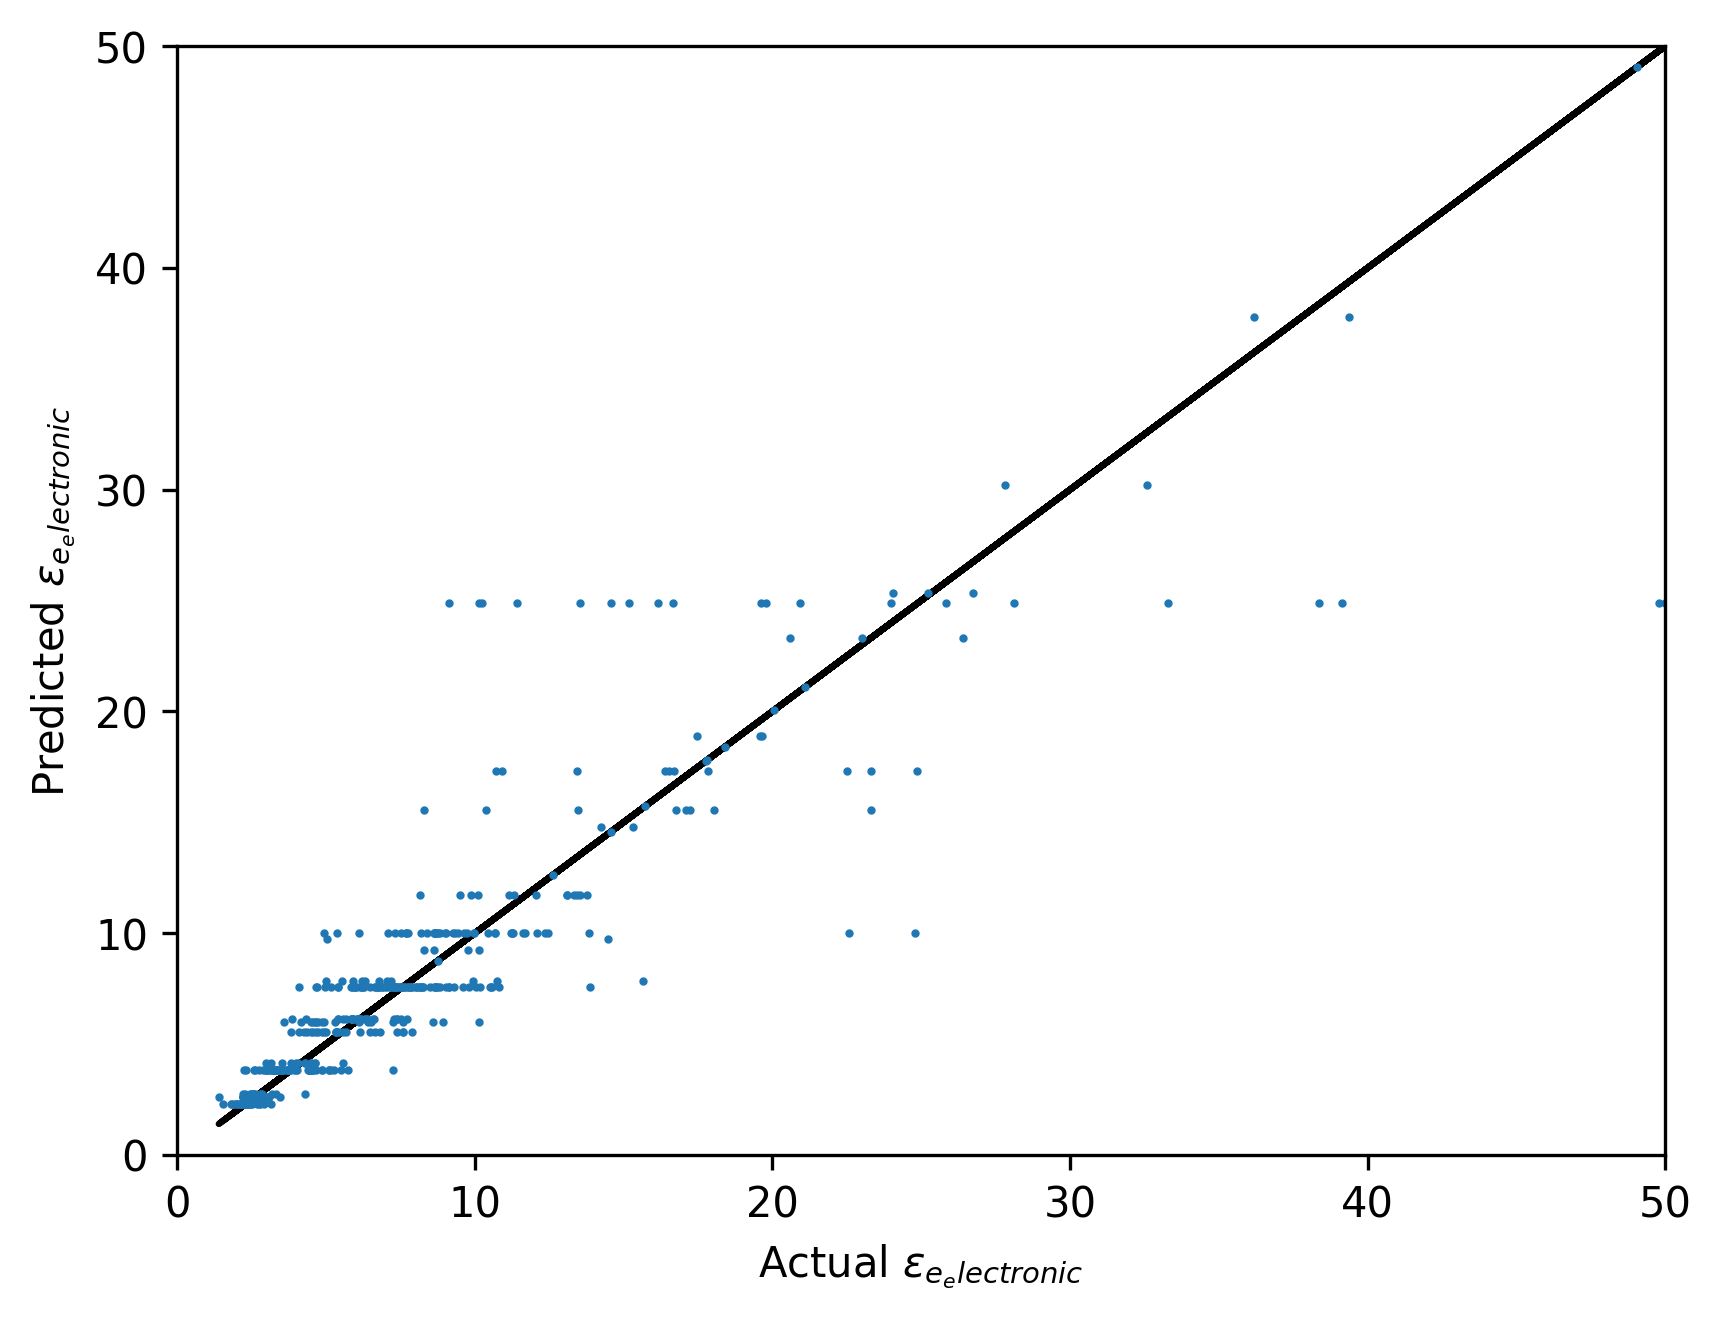

MSE: 0.8975199993218108, MAE: 0.5483206428625813


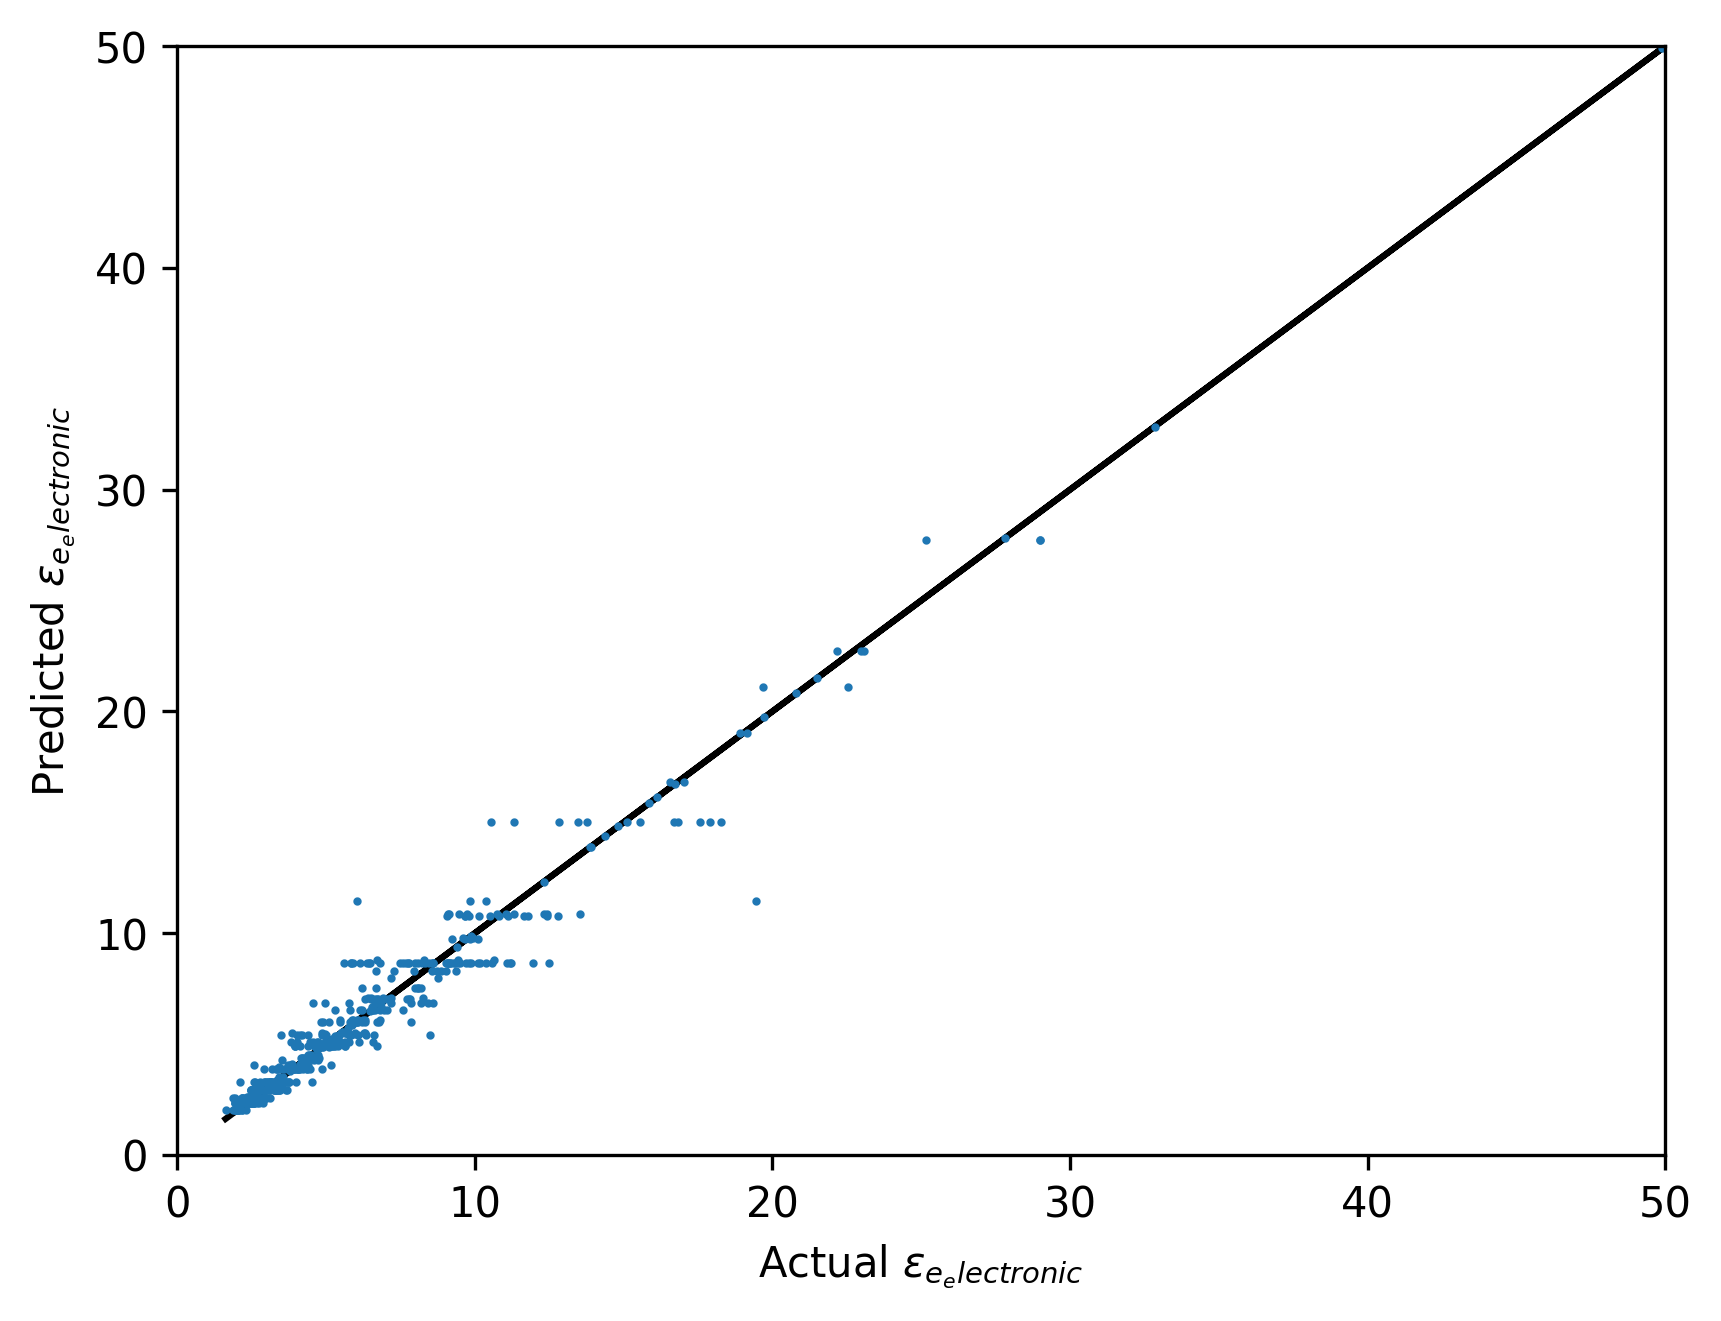

In [19]:
# 对每个group进行训练
dt_models = {}
dt_scalers = {}
best_depths = {}
for group, data_group in grouped_data:
    # 仅训练数据量超过400个的
    if len(data_group) < 400:
        continue
    X, y = get_X_y(data_group)
    scaler, X_scaled = scale(X)
    dt, best_depth = decision_tree(X_scaled, y)
    dt_models[group] = dt
    dt_scalers[group] = scaler
    best_depths[group] = best_depth

In [20]:
best_depths

{0: 9, 1: 8, 3: 5, 4: 8, 6: 12, 8: 6, 9: 7}

##### 模型测试

MSE: 256.03269113003074, MAE: 2.85182284501619


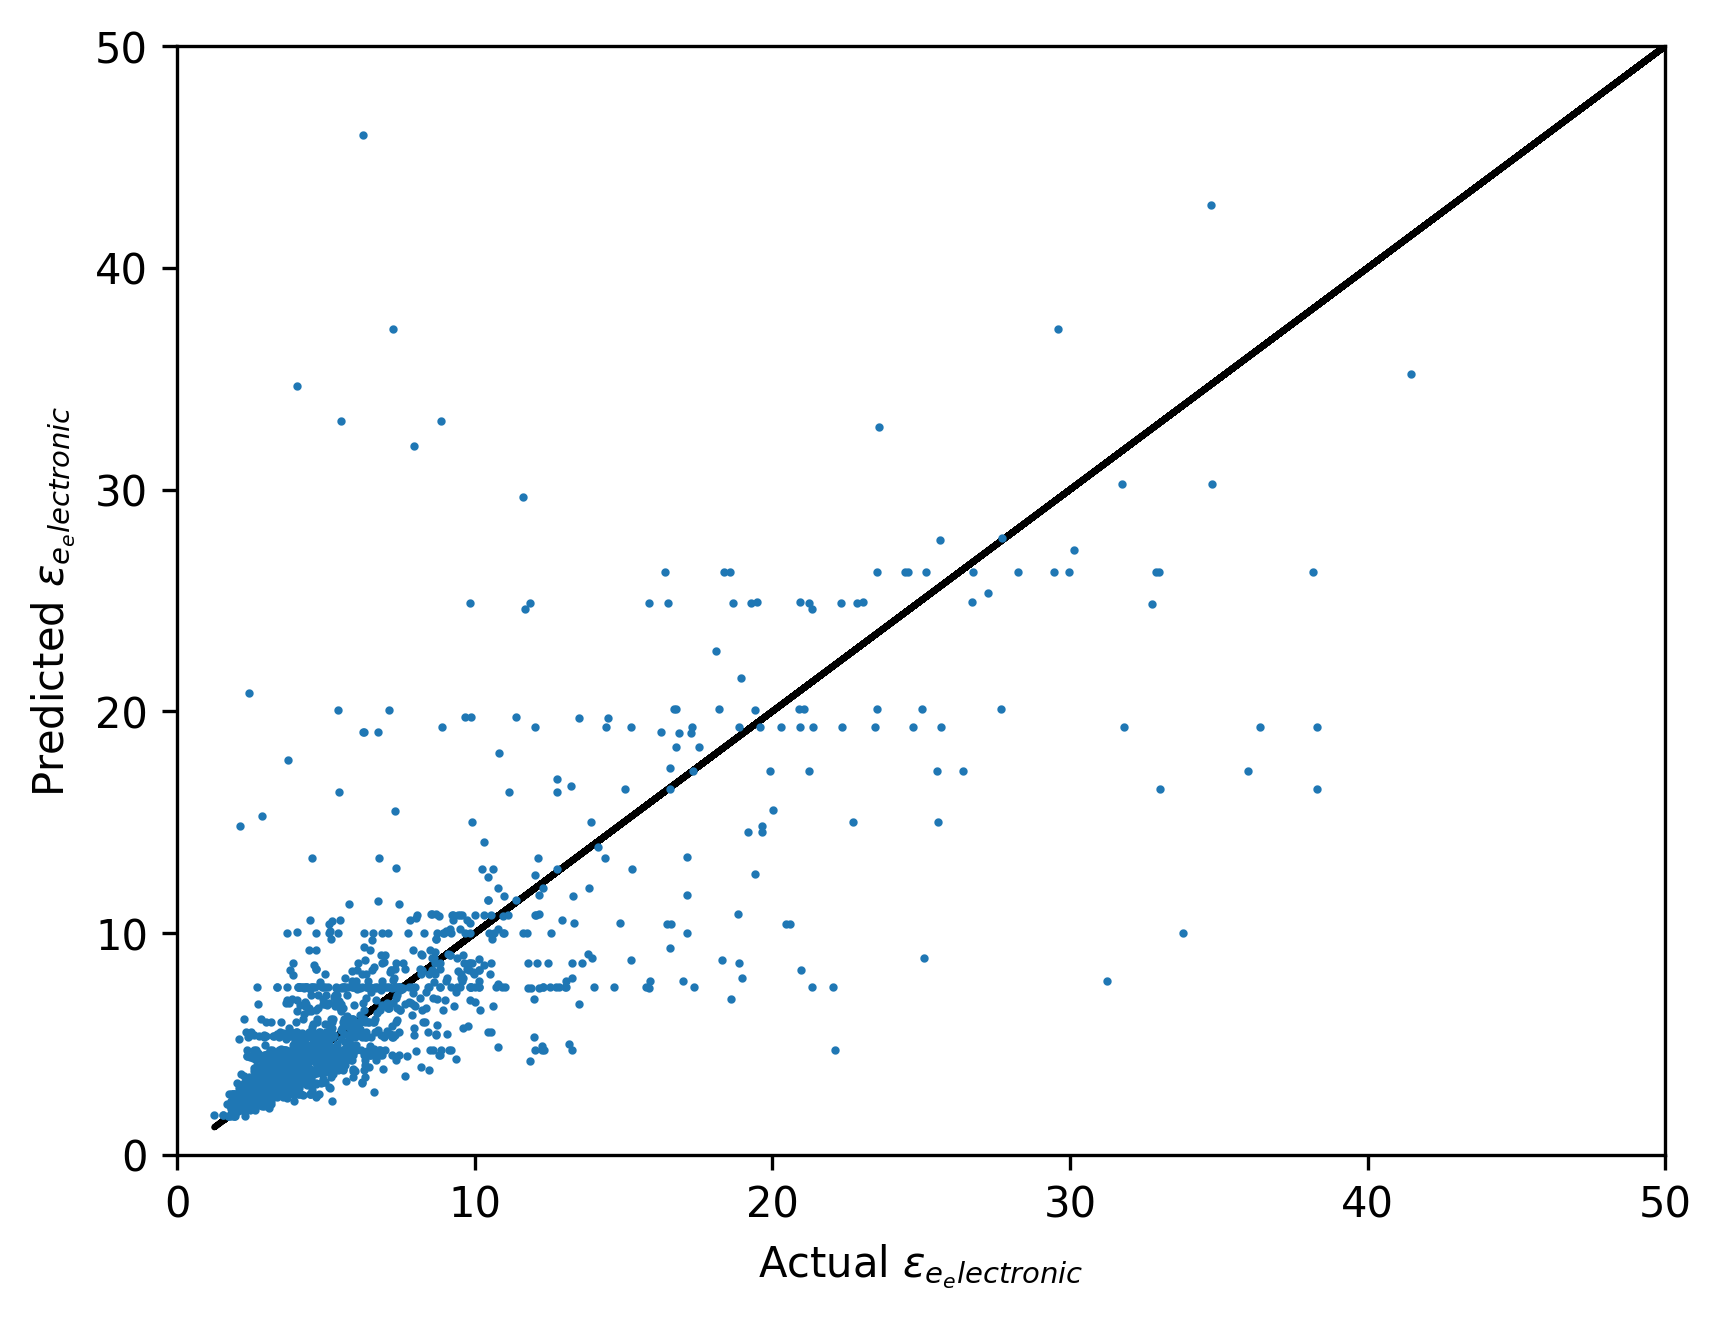

In [21]:
model_test(X_test, dt_models, dt_scalers);

#### 3. 随机森林算法

In [22]:
from sklearn.ensemble import RandomForestRegressor
def random_forest(X_train, y_train, best_depth):
    # 模型训练
    rf = RandomForestRegressor(n_estimators=100, max_depth=best_depth, random_state=RANDOM_STATE)
    rf.fit(X_train, y_train)
    # 模型训练集测试
    mse, mae, y_pred = model_eval(dt, X_train, y_train)
    # 绘制结果
    plot_cross_val_scores(mse, mae, y_pred, y_train)
    return rf

MSE: 60.41613370163054, MAE: 2.9092755086357243


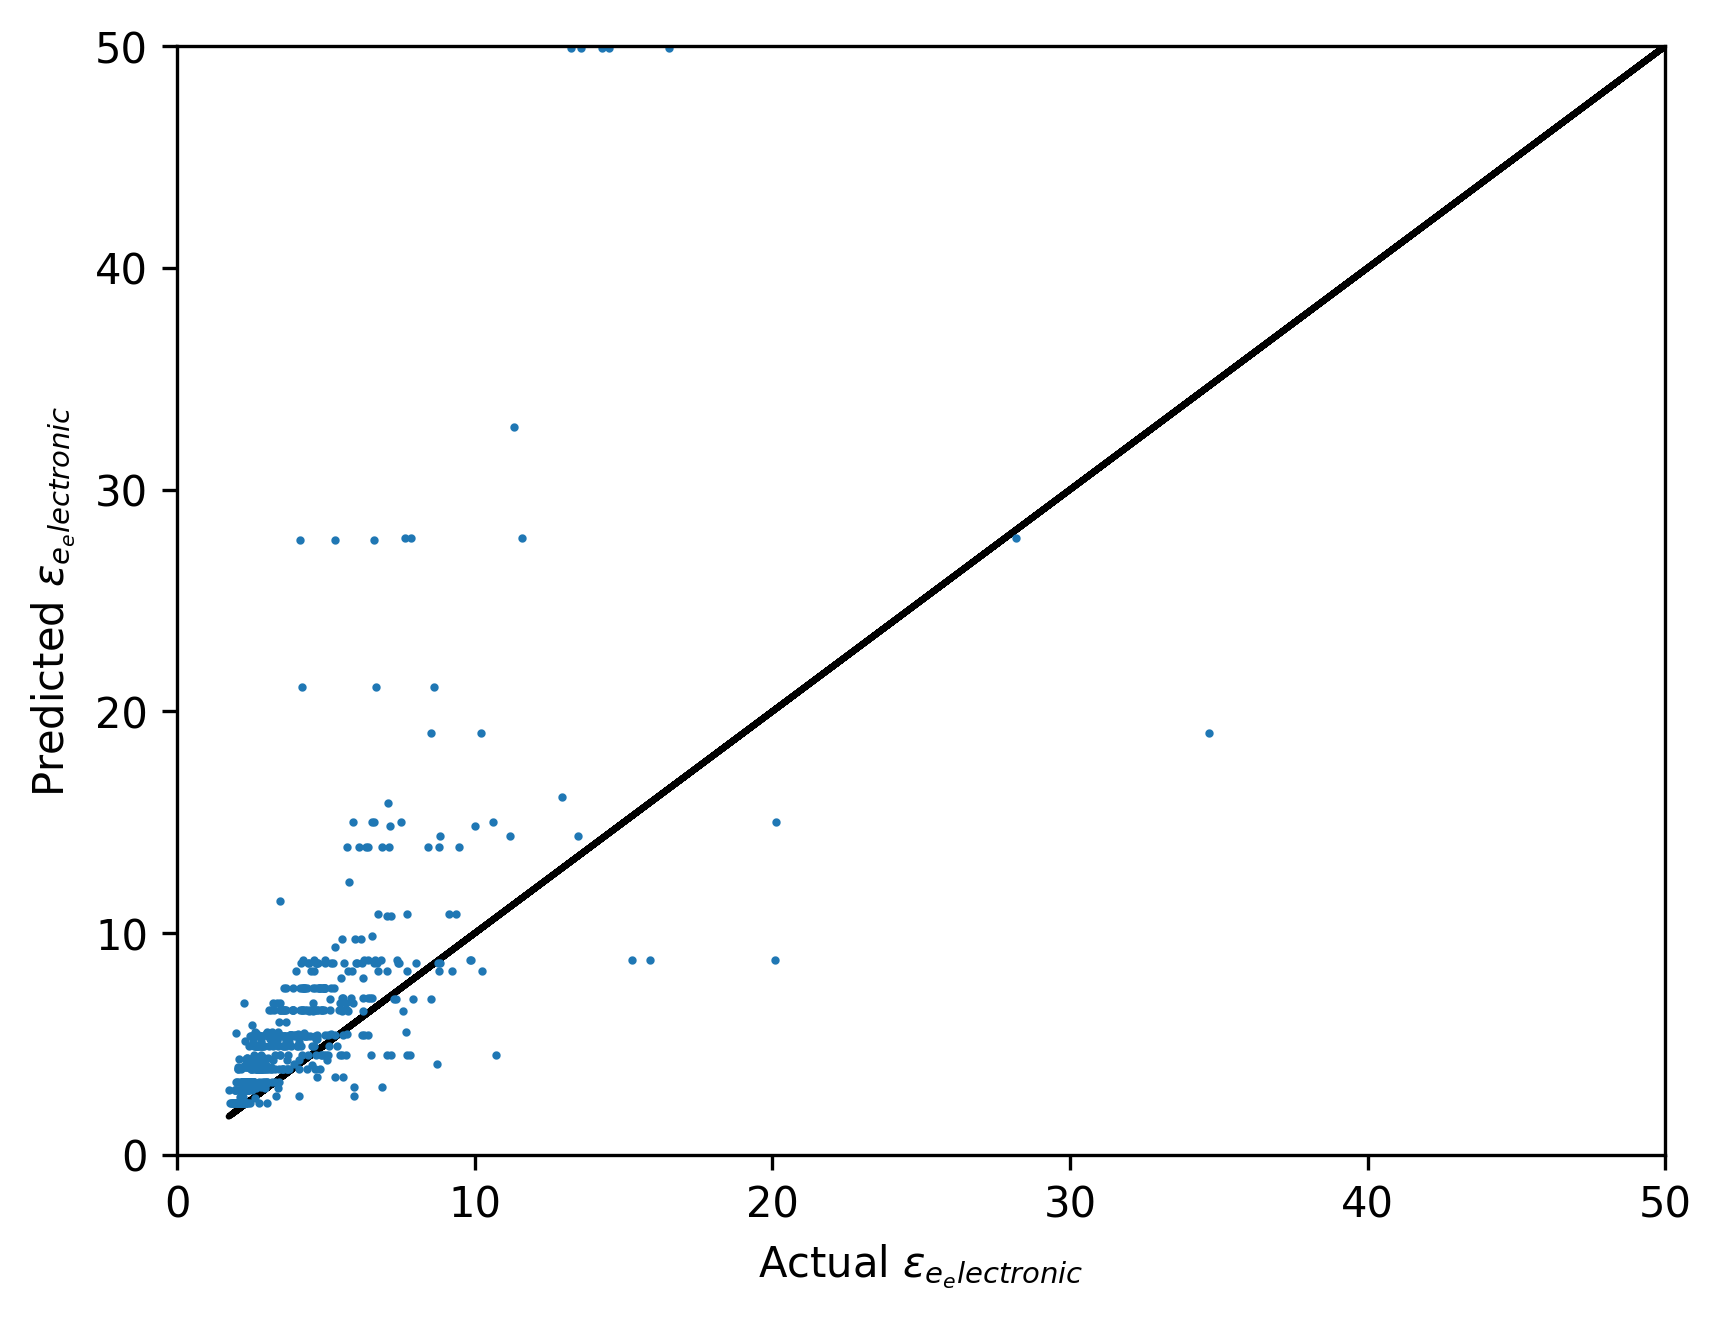

MSE: 314.1335486986195, MAE: 3.0720783952027646


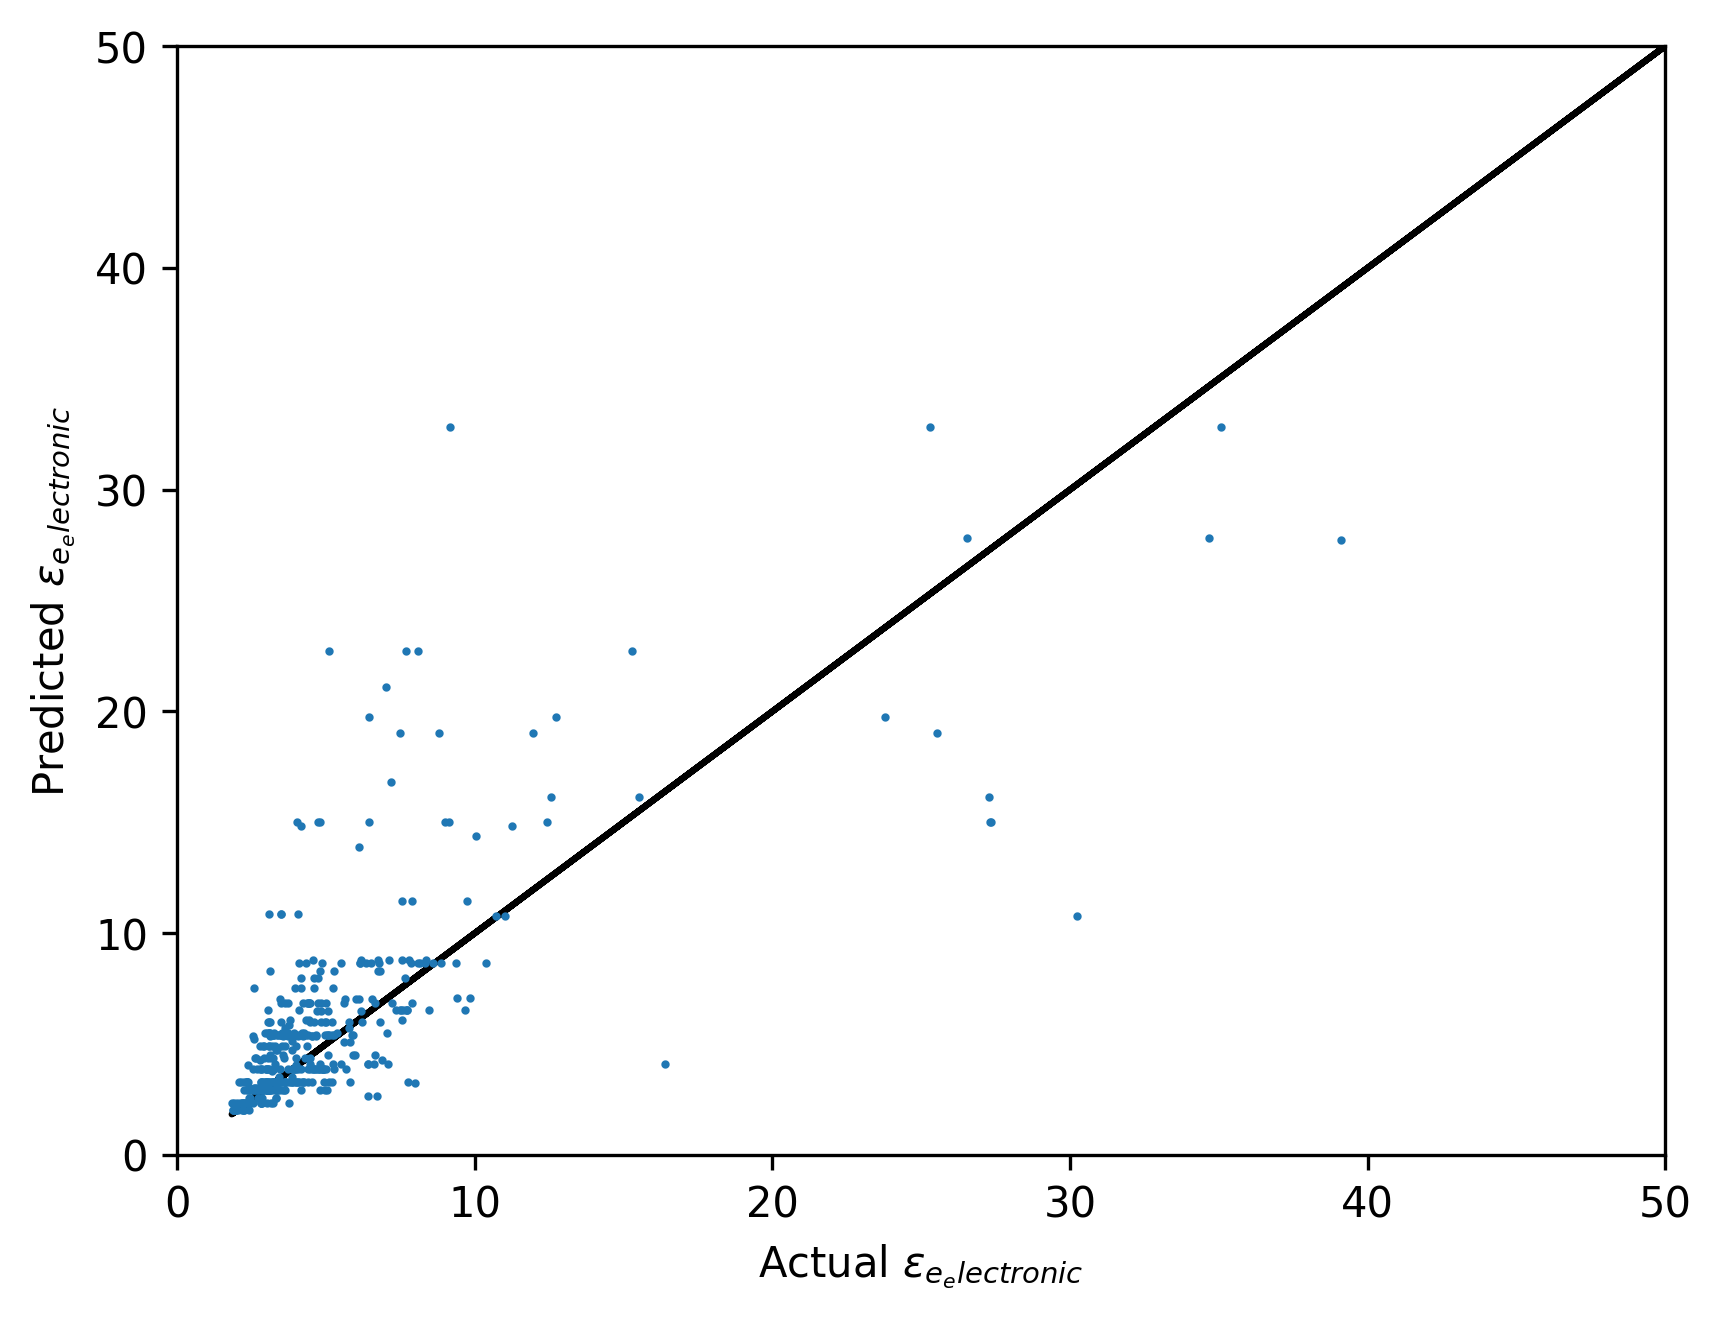

MSE: 77.69626544946102, MAE: 3.0466113242535084


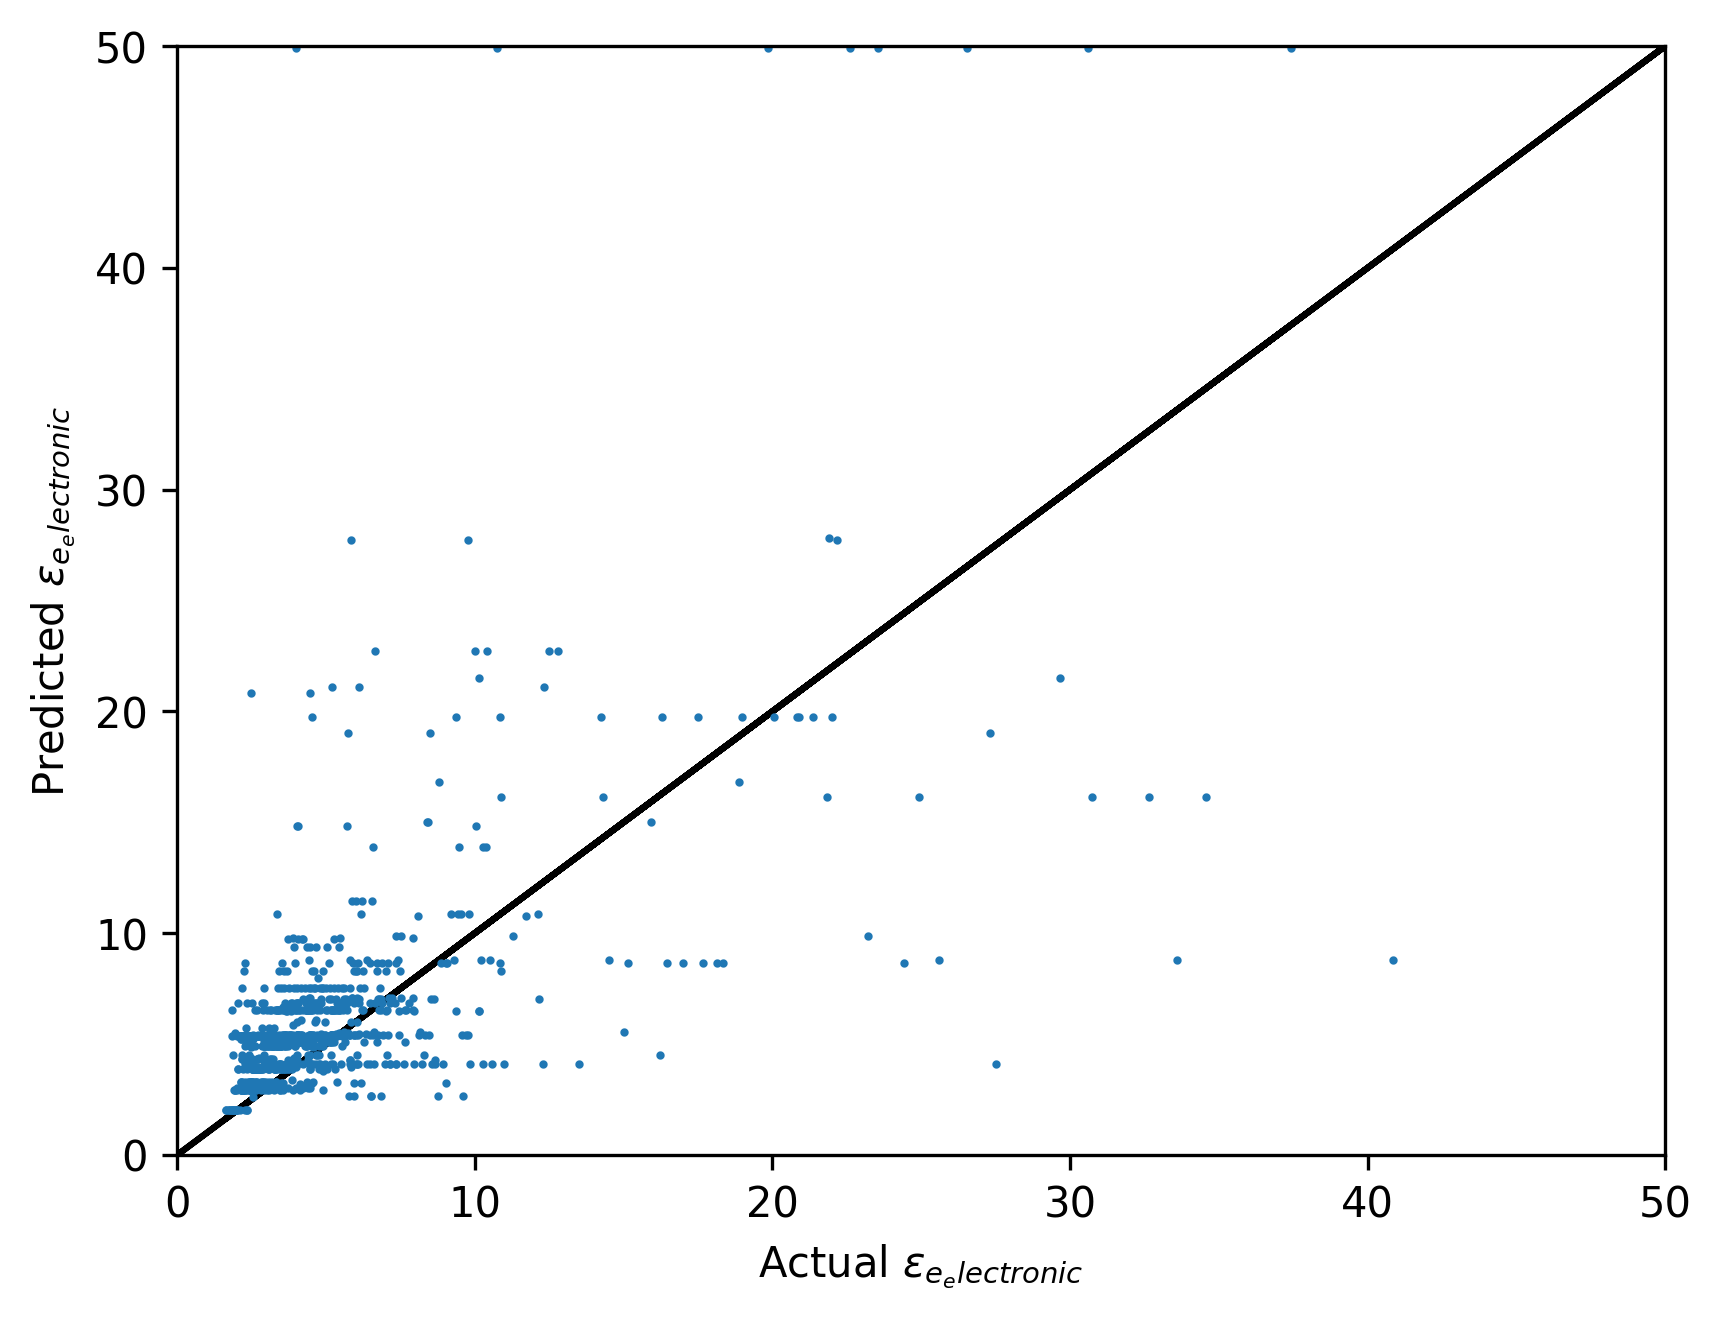

MSE: 475.46205755462836, MAE: 6.314047240935108


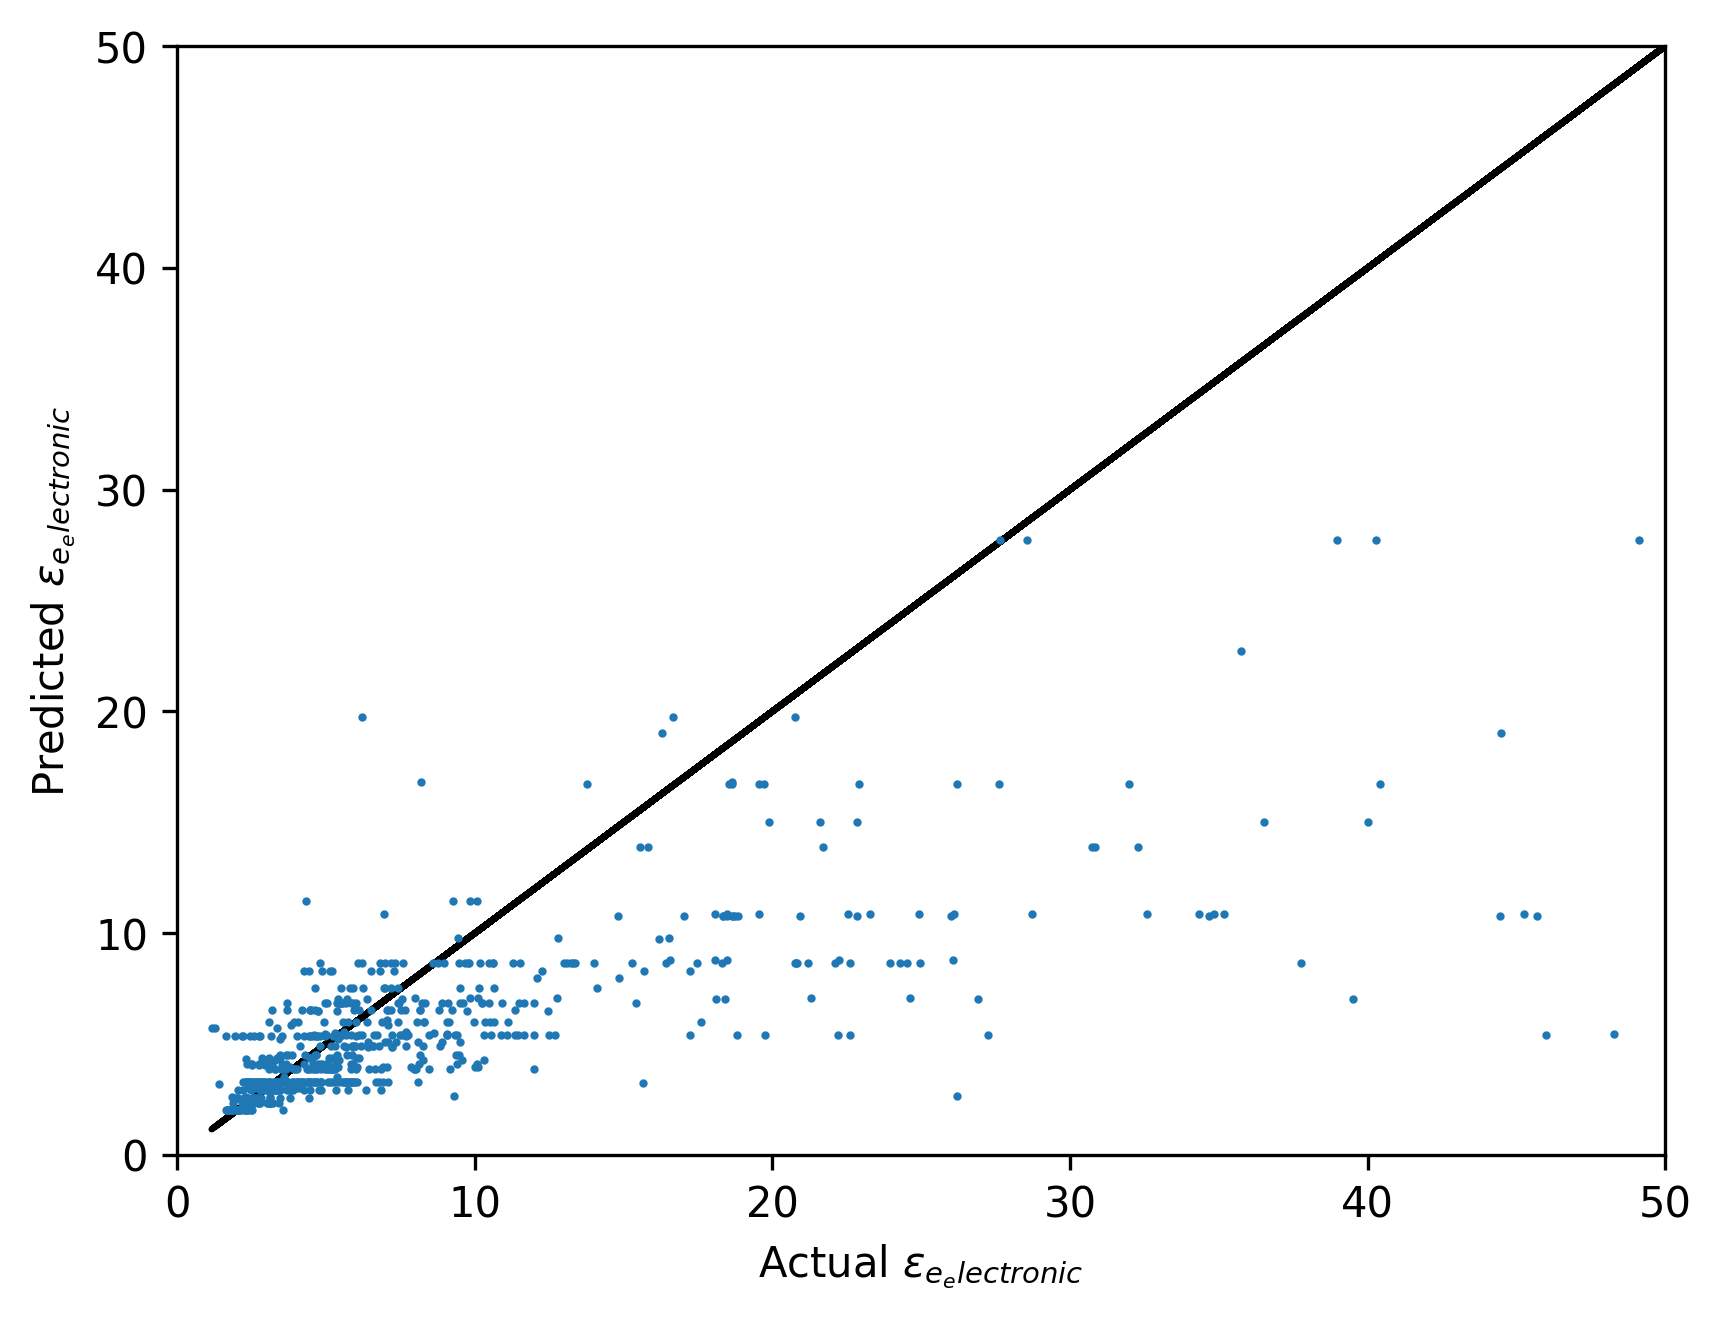

MSE: 199.35507251903672, MAE: 2.99716841223593


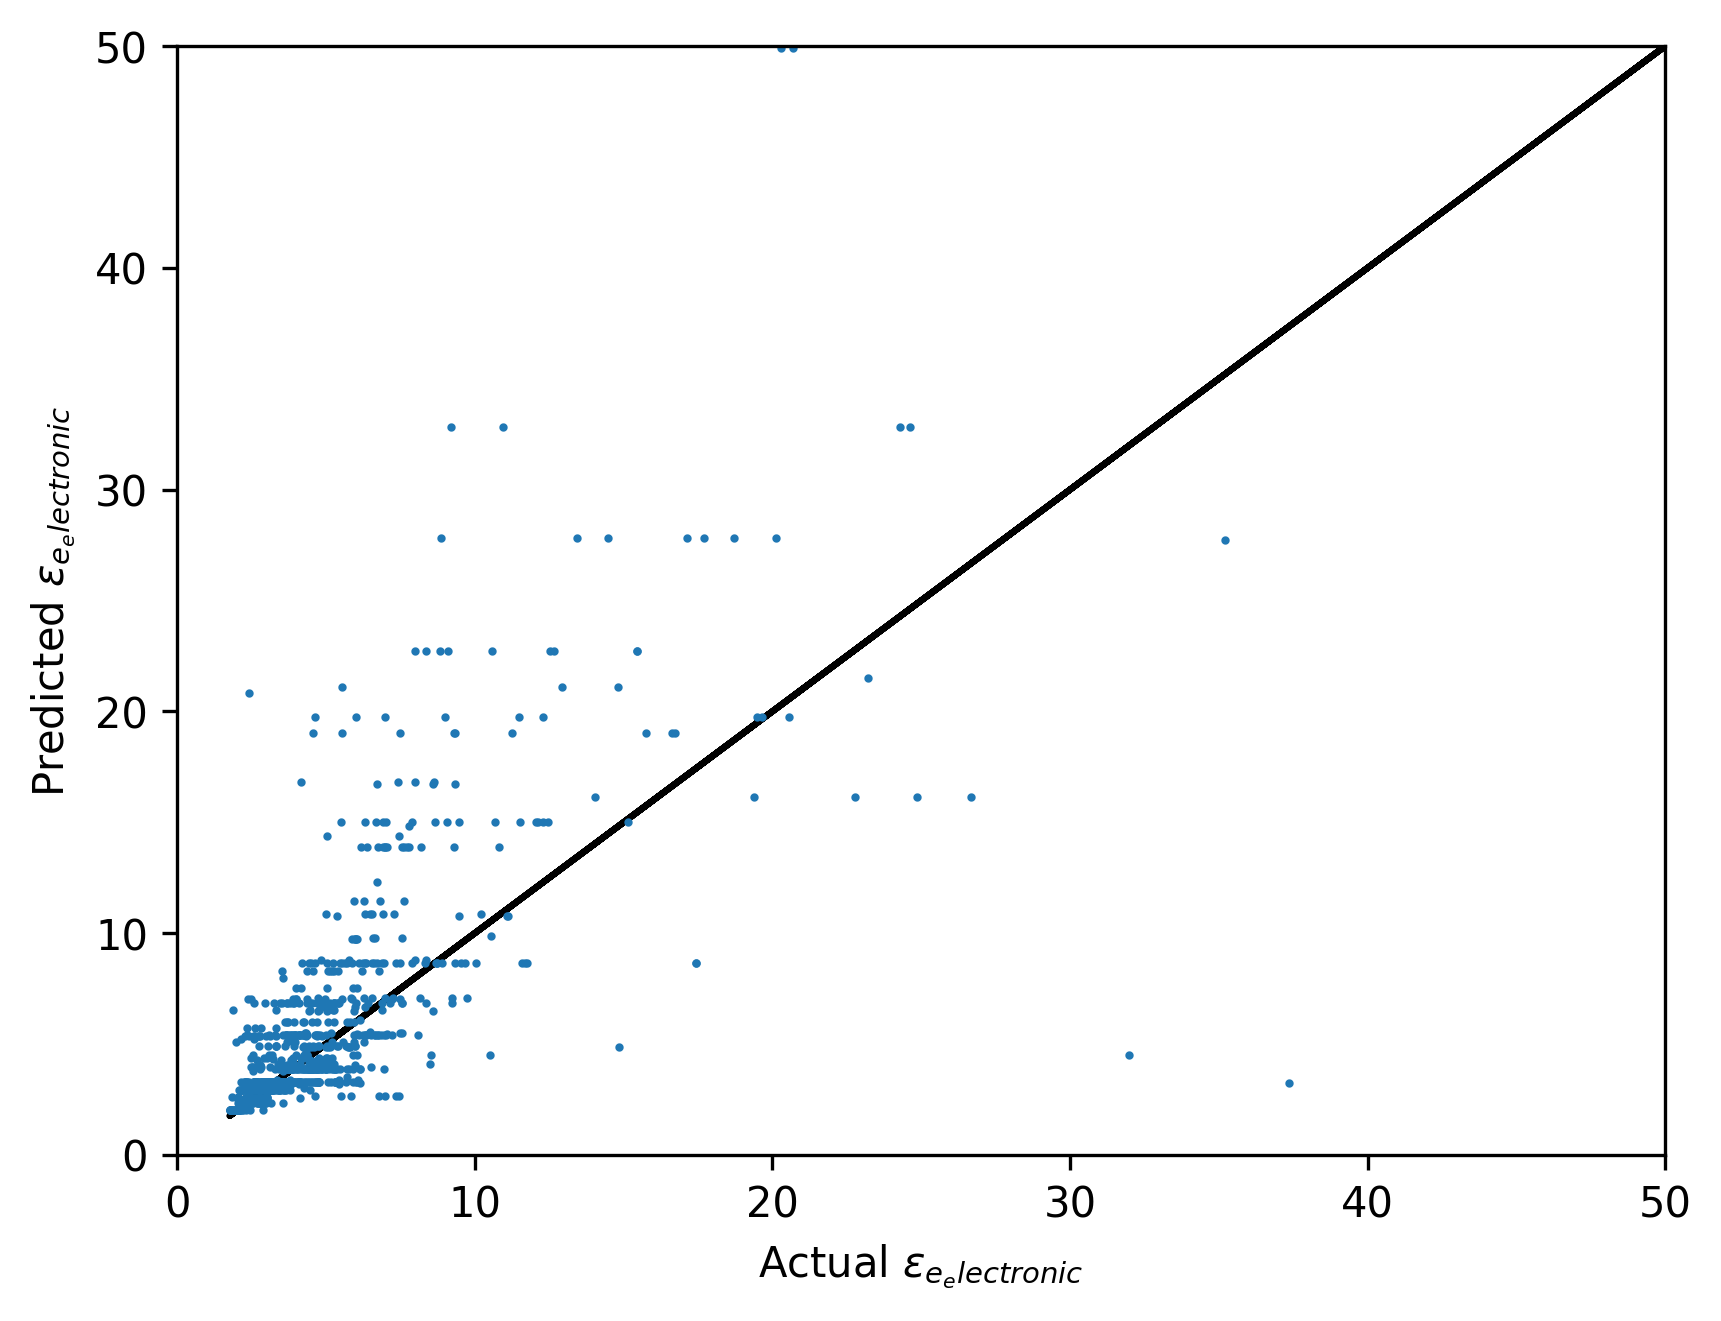

MSE: 385.79510306752405, MAE: 4.975241752671812


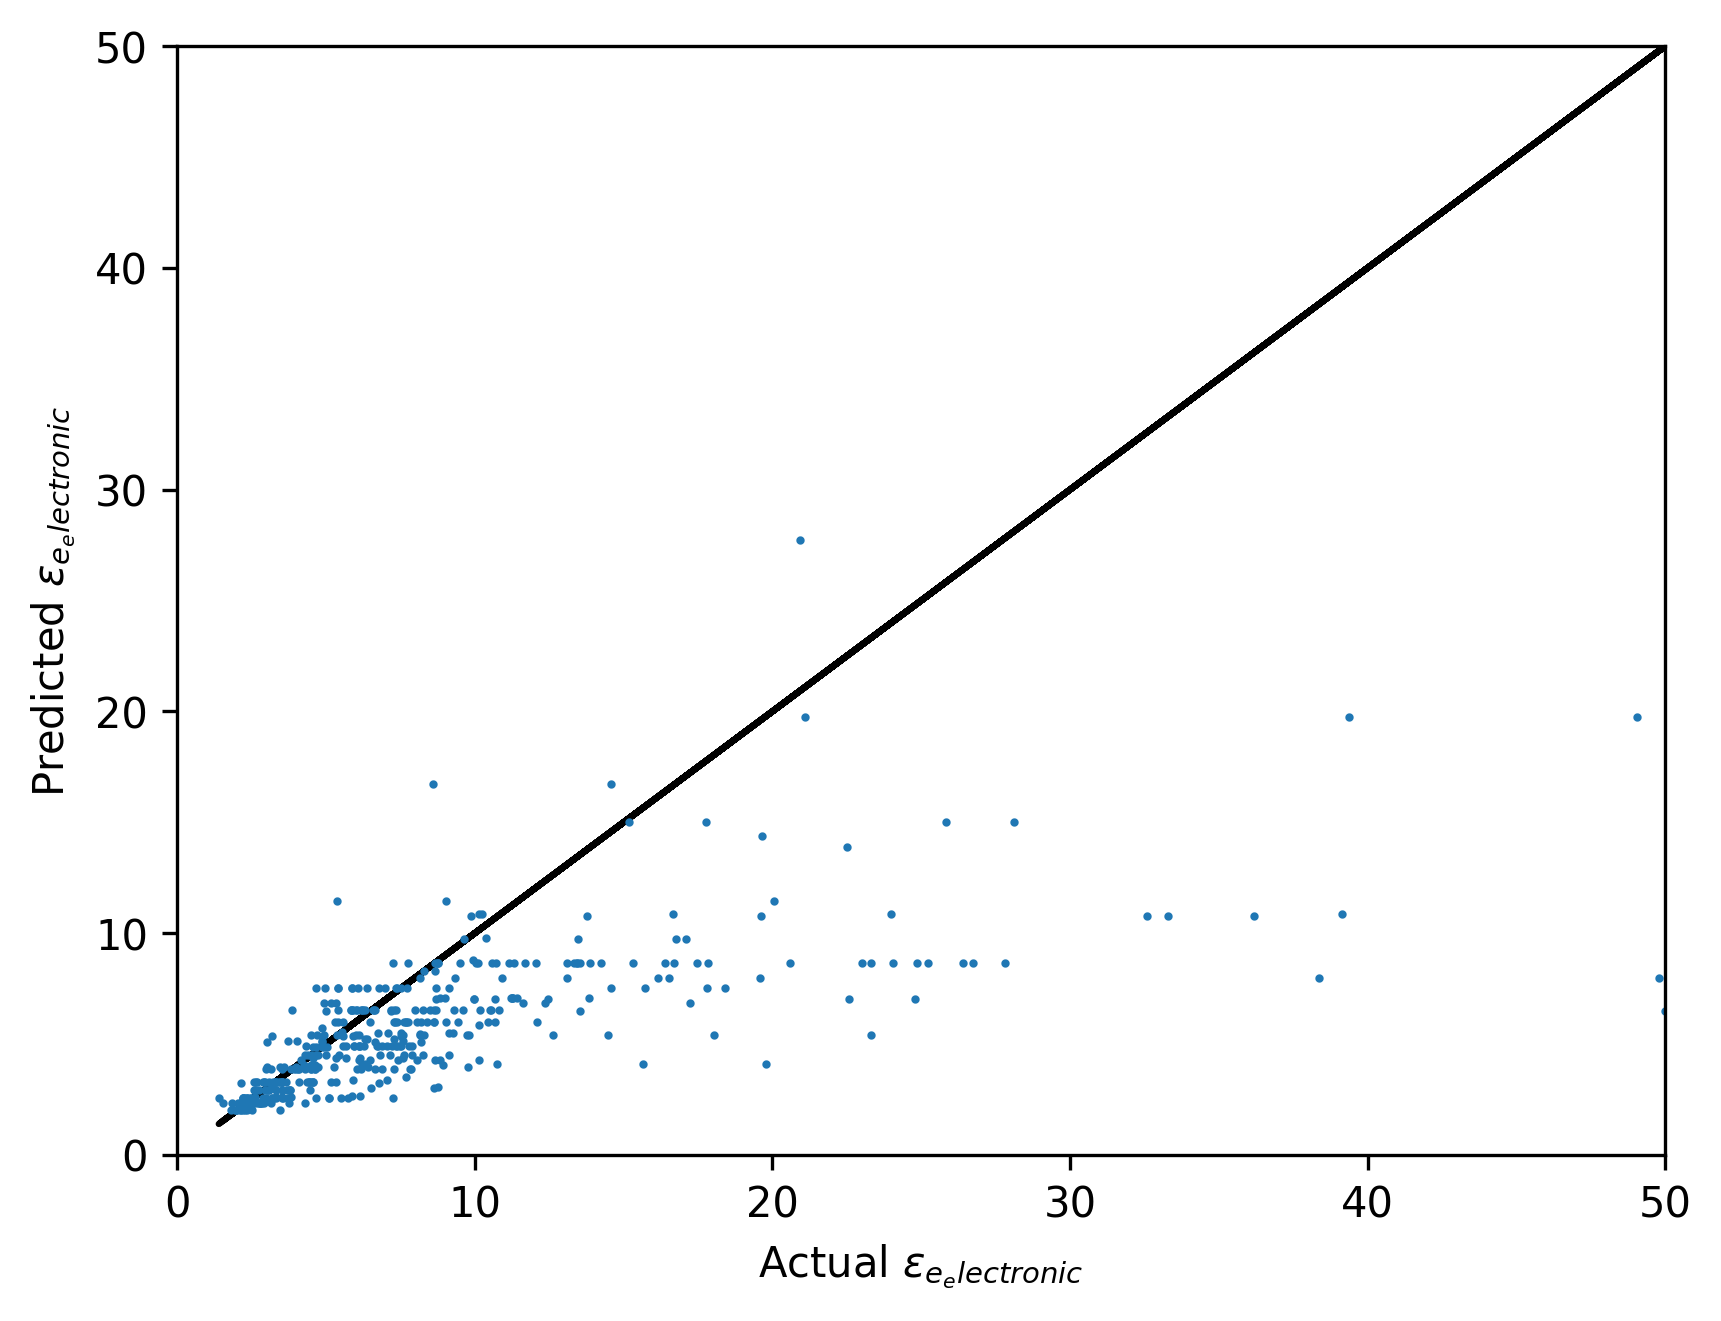

MSE: 0.8975199993218108, MAE: 0.5483206428625813


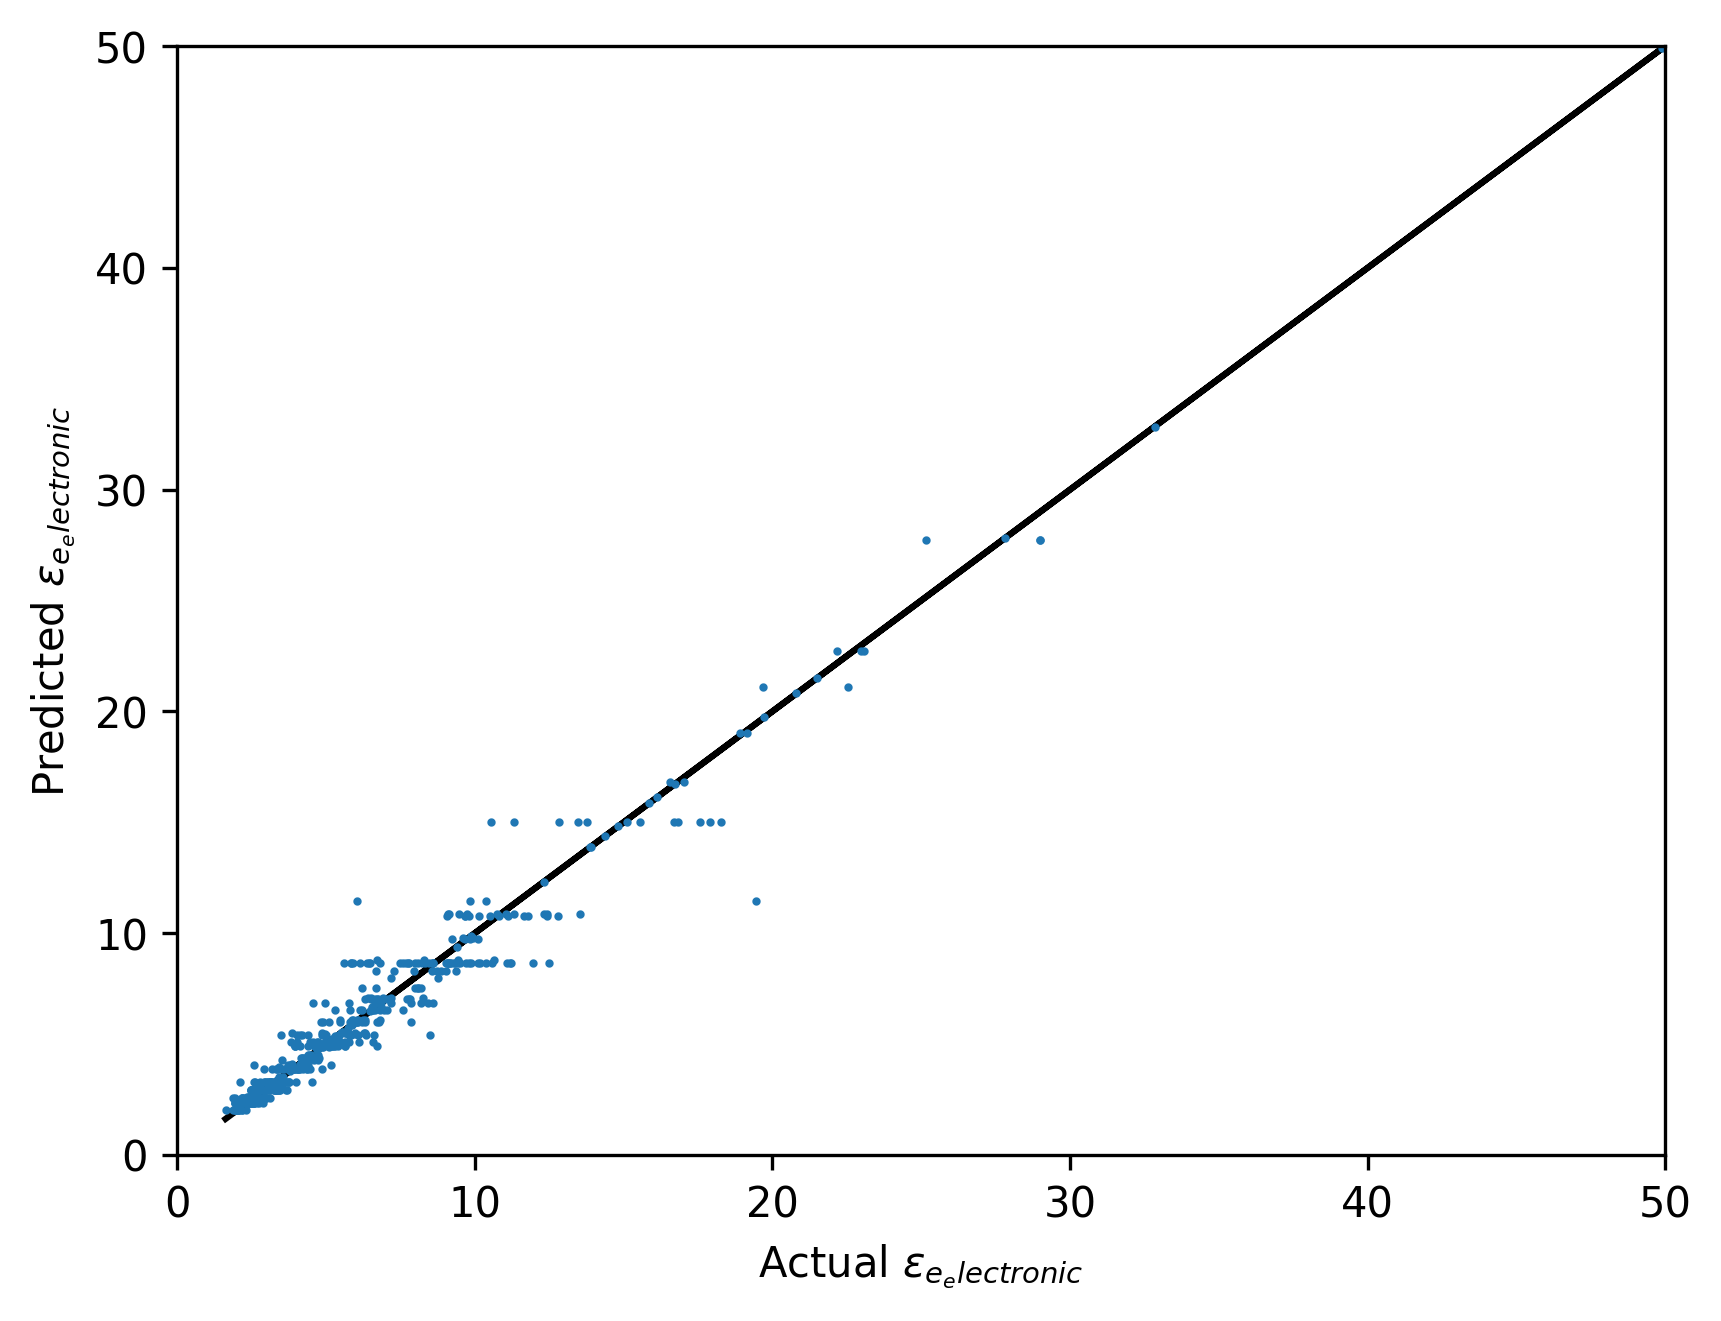

In [23]:
# 对每个group进行训练
rf_models = {}
rf_scalers = {}
for group, data_group in grouped_data:
    # 仅训练数据量超过400个的
    if len(data_group) < 400:
        continue
    X, y = get_X_y(data_group)
    scaler, X_scaled = scale(X)
    rf = random_forest(X_scaled, y, best_depths[group])
    rf_models[group] = rf
    rf_scalers[group] = scaler

##### 模型测试

MSE: 83.24907575045803, MAE: 2.2478406051674162


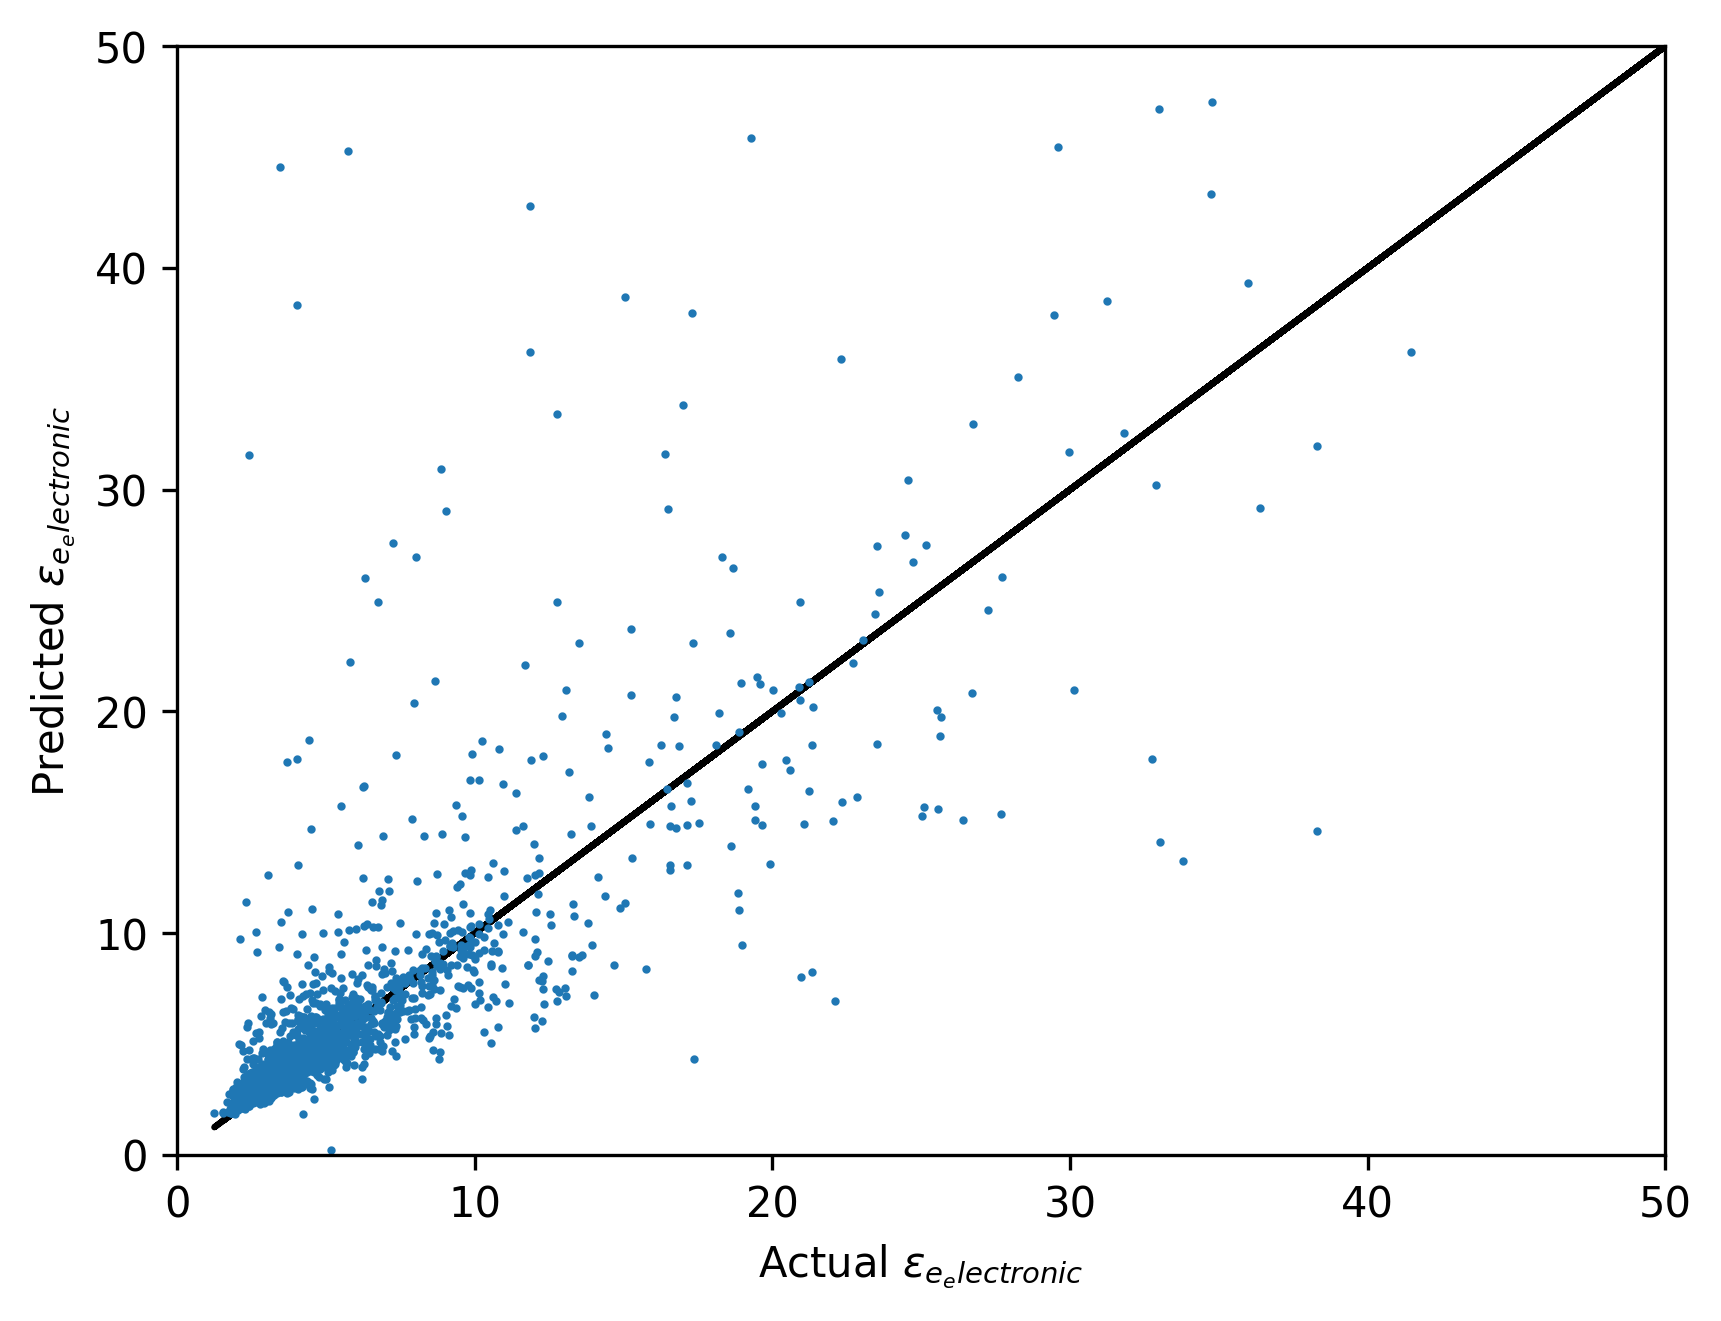

In [24]:
_, _, X_test_pred = model_test(X_test, rf_models, rf_scalers);

In [25]:
X_test_pred.head()

,crystal_system,space_group,band_gap,volume,density,density_atomic,formation_energy_per_atom,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster,e_electronic,e_ionic,e_total,e_electronic_pred
5083,2,189,0.9245,473.246667,3.461689,39.437222,-1.164229,34.0,37.0,3.0,...,170.000000,0.82,2.55,1.73,1.685000,1,3.363473,2.902911,6.266384,4.967333
5084,6,162,0.0000,87.320161,5.791205,9.702240,-1.597766,8.0,33.0,25.0,...,84.222222,1.91,3.44,1.53,2.990000,4,4.294284,6.486058,10.780343,5.125254
5085,5,2,1.3114,565.922230,3.367404,20.960083,-1.130545,1.0,53.0,52.0,...,74.851852,1.31,3.44,2.13,2.578889,9,5.133890,19.865435,24.999325,3.942320
5086,4,12,1.8083,269.068882,4.987902,11.211203,-1.781247,8.0,51.0,43.0,...,106.750000,0.93,3.44,2.51,2.441667,6,3.632911,5.267904,8.900815,4.750537
5087,4,15,3.4886,242.560637,3.970266,12.128032,-2.794766,8.0,49.0,41.0,...,92.600000,0.93,3.44,2.51,2.715000,6,3.027878,4.827287,7.855166,3.310979
